<a href="https://colab.research.google.com/github/AyaElshazly/Fundamentals-Applied-Data-Sci/blob/main/Hotel%20Cancellation%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal



The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior.A significant number of hotel reservations are called-off due to cancellations or no-shows.The typical reasons for cancellations include change of plans, scheduling conflicts, etc.This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with bold text

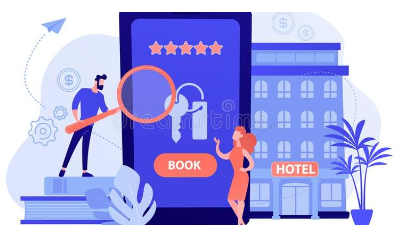

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 51.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.6 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252726 sha256=db5985fbca9c1485b496a8390d83297282ec9054512cacf832d63cbeee7c9a7e
  Stored in directory: /root/

# Importing libraries that we will use in our project

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from dataprep.eda import create_report, plot, plot_correlation, plot_missing , plot_diff

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from seaborn.rcmod import palettes
from sklearn.svm import SVC


from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
import time

import warnings
warnings.filterwarnings("ignore")

#Description of columns that we have in the dataset

###**Booking_ID**: unique identifier of each booking
###**no_of_adults**: Number of adults
###**no_of_children**: Number of Children
###**no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
###**no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
###**type_of_meal_plan**: Type of meal plan booked by the customer:
###**required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
###**room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
###**lead_time**: Number of days between the date of booking and the arrival date
###**arrival_year**: Year of arrival date
###**arrival_month**: Month of arrival date
###**arrival_date**: Date of the month
###**market_segment_type**: Market segment designation.
###**repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
###**no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
###**no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
###**avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
###**no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
###**booking_status**: Flag indicating if the booking was canceled or not.

# Explore Our Dataset

In [ ]:
Data = pd.read_csv('Hotel Reservations.csv')

In [ ]:
# Summarize Data set
# Display dimensions of data set
print("Shape of dataset",Data.shape)

Shape of dataset (36275, 19)


In [ ]:
# first 5 rows in data
Data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
#last 5 rows of data
Data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



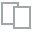
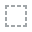
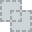
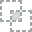
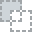
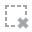
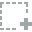
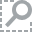
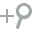
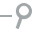
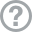
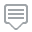
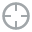
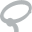
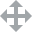
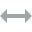
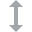
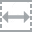
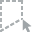
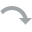
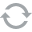
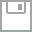
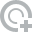
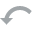
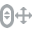
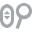
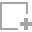
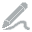
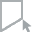
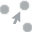
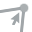
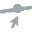

In [ ]:

# Create Dataprep EDA report
report = create_report(Data)

# Show the report
report.show()

In [ ]:
# check if there are duplicates
duplicates = Data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [ ]:
# check if there are missing values
Data.isnull().values.any()

False

In [ ]:
# display some information about features
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:



# describe the data
Data.describe().T.style

In [ ]:
Data.select_dtypes(include = 'object')

Booking_ID type_of_meal_plan room_type_reserved market_segment_type  \
0       INN00001       Meal Plan 1        Room_Type 1             Offline   
1       INN00002      Not Selected        Room_Type 1              Online   
2       INN00003       Meal Plan 1        Room_Type 1              Online   
3       INN00004       Meal Plan 1        Room_Type 1              Online   
4       INN00005      Not Selected        Room_Type 1              Online   
...          ...               ...                ...                 ...   
36270   INN36271       Meal Plan 1        Room_Type 4              Online   
36271   INN36272       Meal Plan 1        Room_Type 1              Online   
36272   INN36273       Meal Plan 1        Room_Type 1              Online   
36273   INN36274      Not Selected        Room_Type 1              Online   
36274   INN36275       Meal Plan 1        Room_Type 1             Offline   

      booking_status  
0       Not_Canceled  
1       Not_Canceled  
2           Canceled  
3           Canceled  
4           Canceled  
...              ...  
36270   Not_Canceled  
36271       Canceled  
36272   Not_Canceled  
36273       Canceled  
36274   Not_Canceled  

[36275 rows x 5 columns]

In [ ]:
# total unique values in each column
Data.select_dtypes(include = 'object').apply(pd.Series.nunique)

Booking_ID             36275
type_of_meal_plan          4
room_type_reserved         7
market_segment_type        5
booking_status             2
dtype: int64

In [ ]:
# display the unique values in each column
for column in Data.columns:
    unique_values = Data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print()

Unique values in column 'Booking_ID': ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']

Unique values in column 'no_of_adults': [2 1 3 0 4]

Unique values in column 'no_of_children': [ 0  2  1  3 10  9]

Unique values in column 'no_of_weekend_nights': [1 2 0 4 3 6 5 7]

Unique values in column 'no_of_week_nights': [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]

Unique values in column 'type_of_meal_plan': ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Unique values in column 'required_car_parking_space': [0 1]

Unique values in column 'room_type_reserved': ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Unique values in column 'lead_time': [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  

In [ ]:
#finding count of unique values
Data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [ ]:
# Display the levels for the class
print("Unique Values in target column",Data['booking_status'].unique())
# Summarize the class distribution
percentage = Data['booking_status'].value_counts(normalize=True) * 100
print(pd.concat([Data['booking_status'].value_counts(), percentage], axis=1, keys=['freq', 'percentage']))

Unique Values in target column ['Not_Canceled' 'Canceled']
               freq  percentage
Not_Canceled  24390   67.236389
Canceled      11885   32.763611


The dataset is not balanced, as the target column has about 32.7% of class 1 (Canceled) and 67.2% of class 0 (Not_Canceled)

#Visualization of the data before any preprocessing

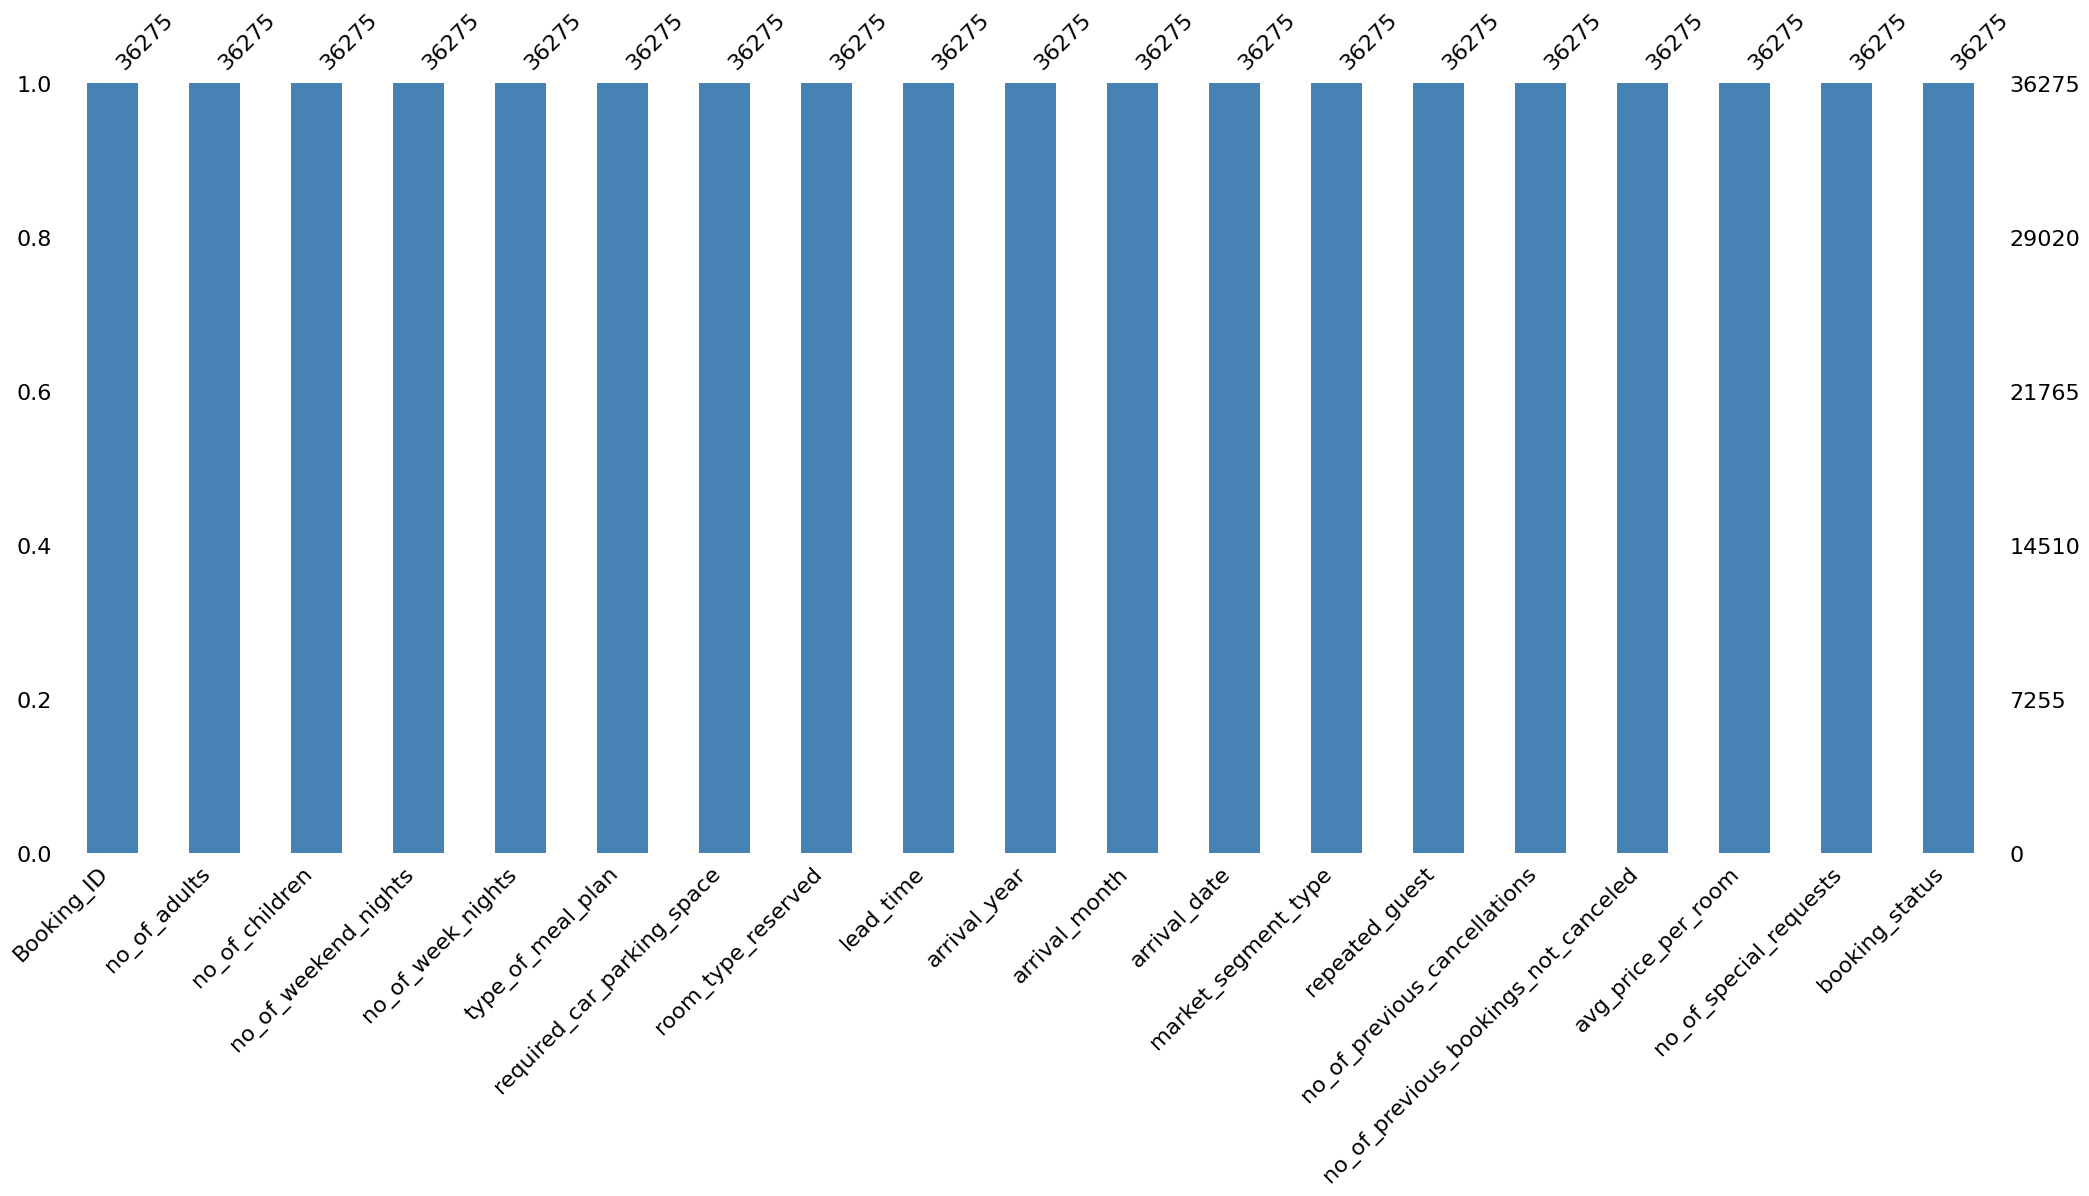

In [ ]:
# Visualize missing values
# Define a color palette
msno.bar(Data, color="steelblue")
plt.show()

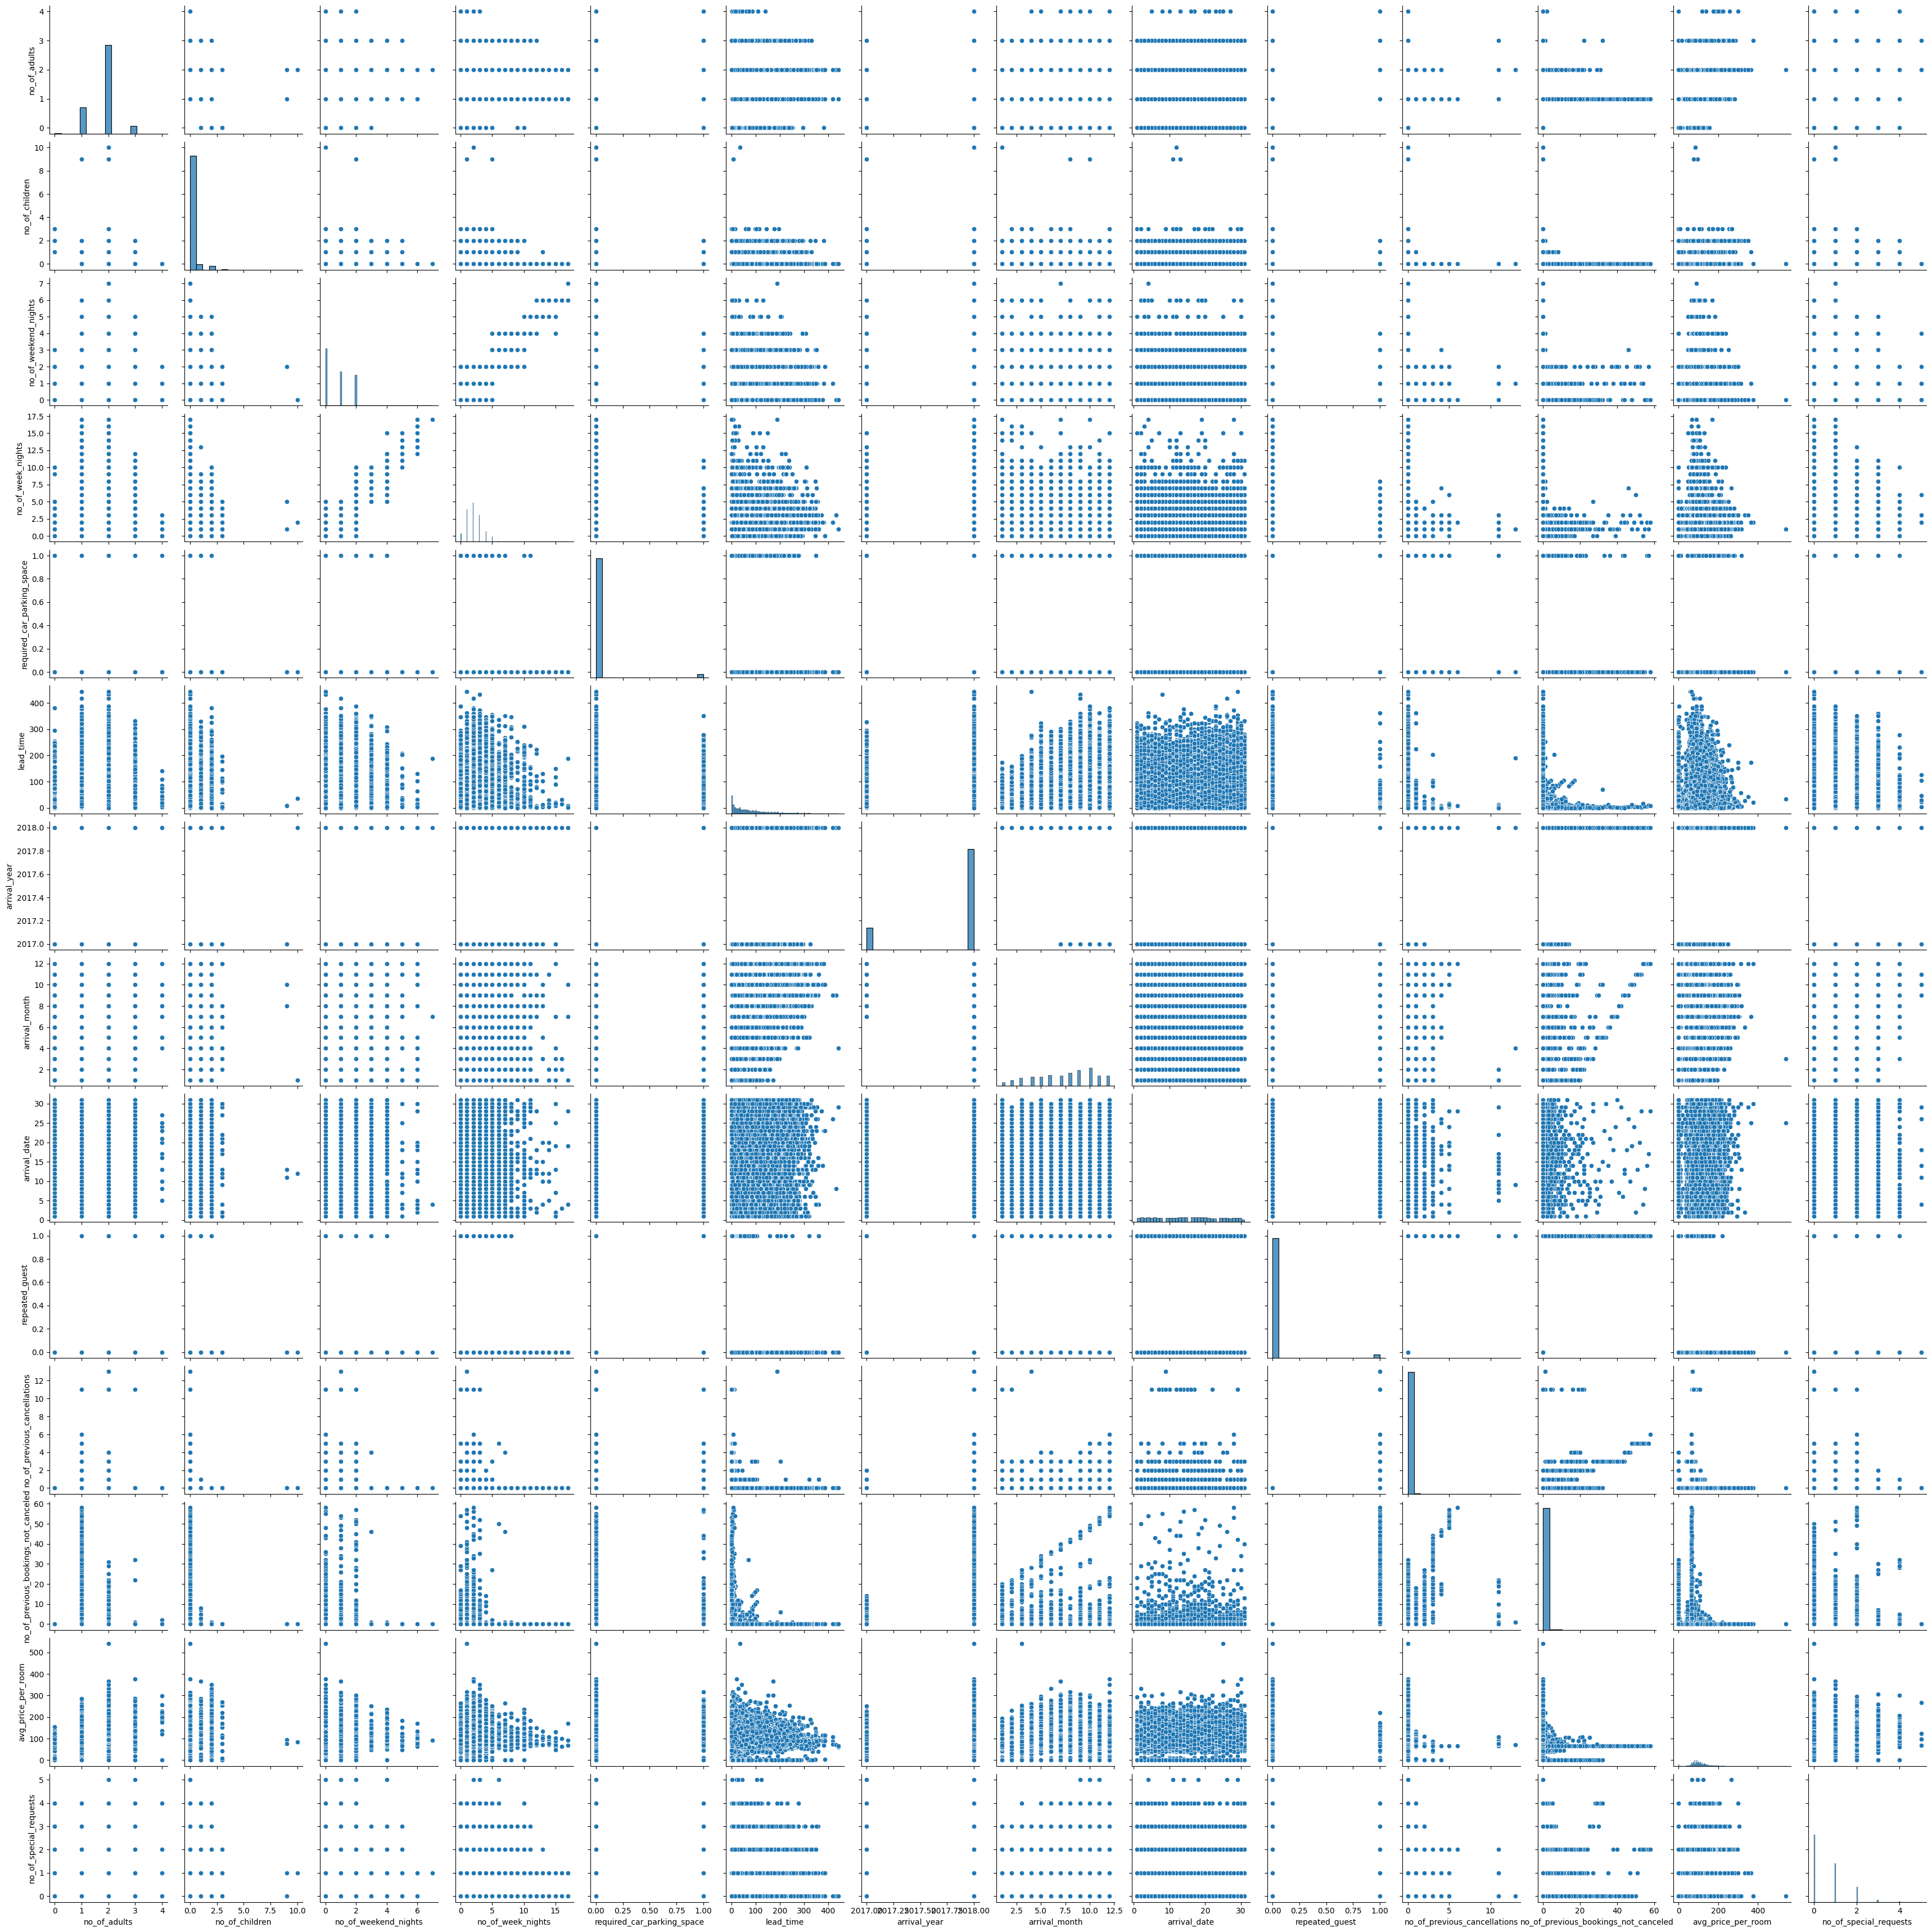

In [ ]:
# find relationship between features
sns.pairplot(Data)
plt.show()

In [ ]:
(Data.no_of_previous_bookings_not_canceled == 0 ).sum()

35463

Rate Of Cancellation

In [ ]:
print('Canceled_rate is',len(Data[Data['booking_status'] == 'Canceled'])*100/len(Data),'%')

Canceled_rate is 32.76361130254997 %


Rate Of NO_Cancellation

In [ ]:
print('No_Canceled_rate is',len(Data[Data['booking_status'] == 'Not_Canceled'])*100/len(Data),'%')

No_Canceled_rate is 67.23638869745004 %


Compute the correlation matrix

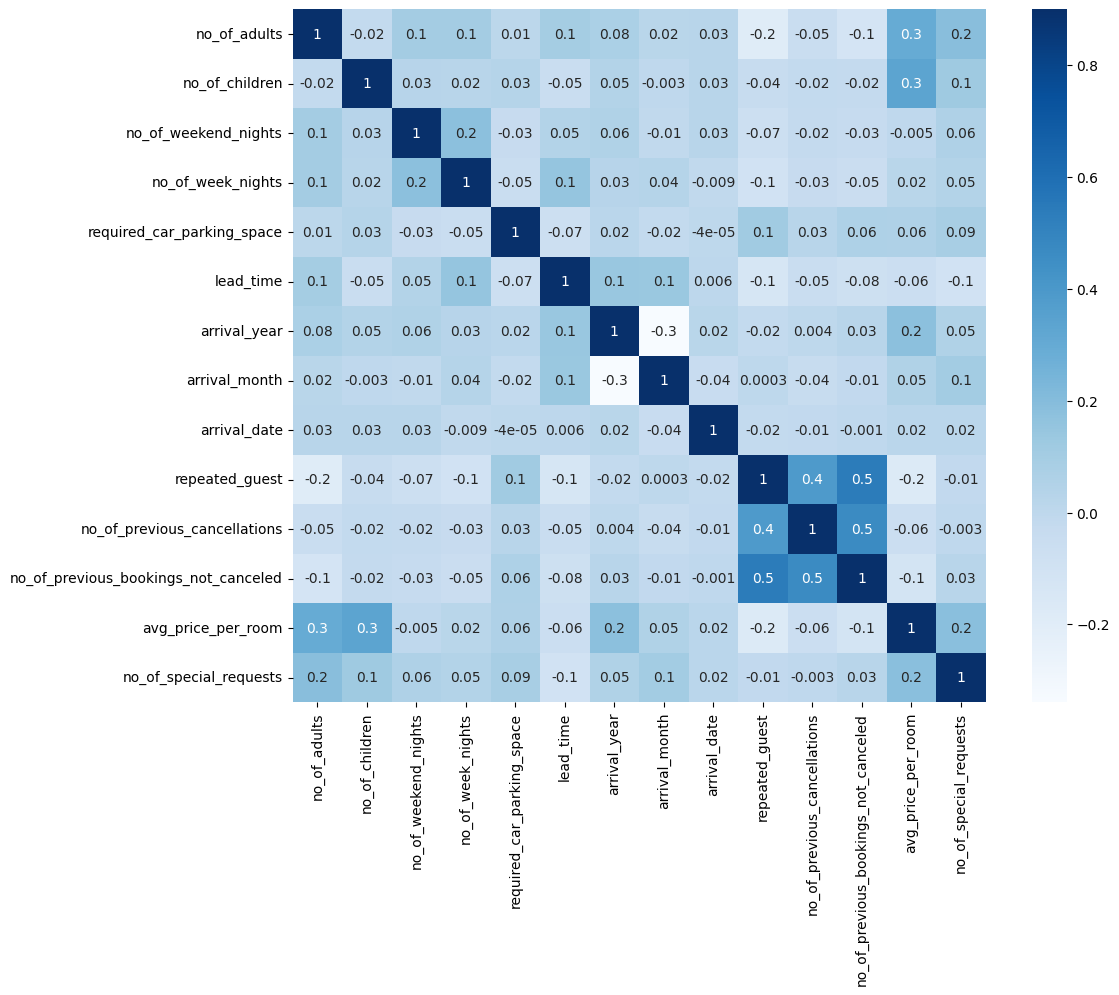

In [ ]:
corrmat = Data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='Blues',fmt='.1g')
plt.show()

## **Here we tried to show the distribution of most of columns and handle outliers and calculate the probabilities in some of them **

Distrubution Plots for Numeric Features

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

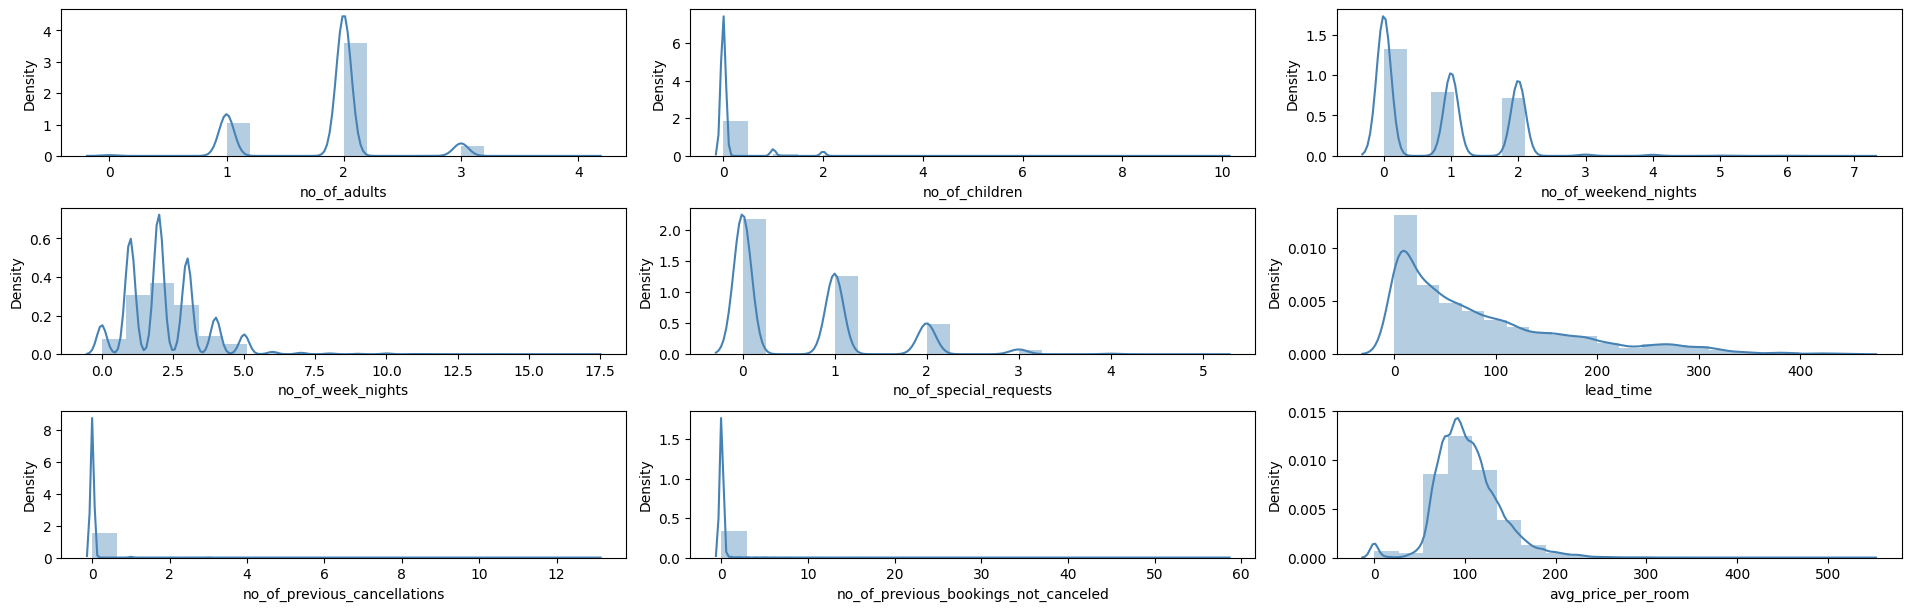

In [ ]:
f,ax=plt.subplots(3,3,figsize=(19,6),constrained_layout = True)
sns.distplot(Data["no_of_adults"],bins=20,ax=ax[0,0],color='steelblue')

sns.distplot(Data["no_of_children"],bins=20,ax=ax[0,1],color='steelblue')

sns.distplot(Data["no_of_weekend_nights"],bins=20,ax=ax[0,2],color='steelblue')

sns.distplot(Data["no_of_week_nights"],bins=20,ax=ax[1,0],color='steelblue')

sns.distplot(Data["no_of_special_requests"],bins=20,ax=ax[1,1],color='steelblue')

sns.distplot(Data["lead_time"],bins=20,ax=ax[1,2],color='steelblue')

sns.distplot(Data["no_of_previous_cancellations"],bins=20,ax=ax[2,0],color='steelblue')

sns.distplot(Data["no_of_previous_bookings_not_canceled"],bins=20,ax=ax[2,1],color='steelblue')

sns.distplot(Data["avg_price_per_room"],bins=20,ax=ax[2,2],color='steelblue')

**If you noticed that almost all of the distributions have skewed distributions**

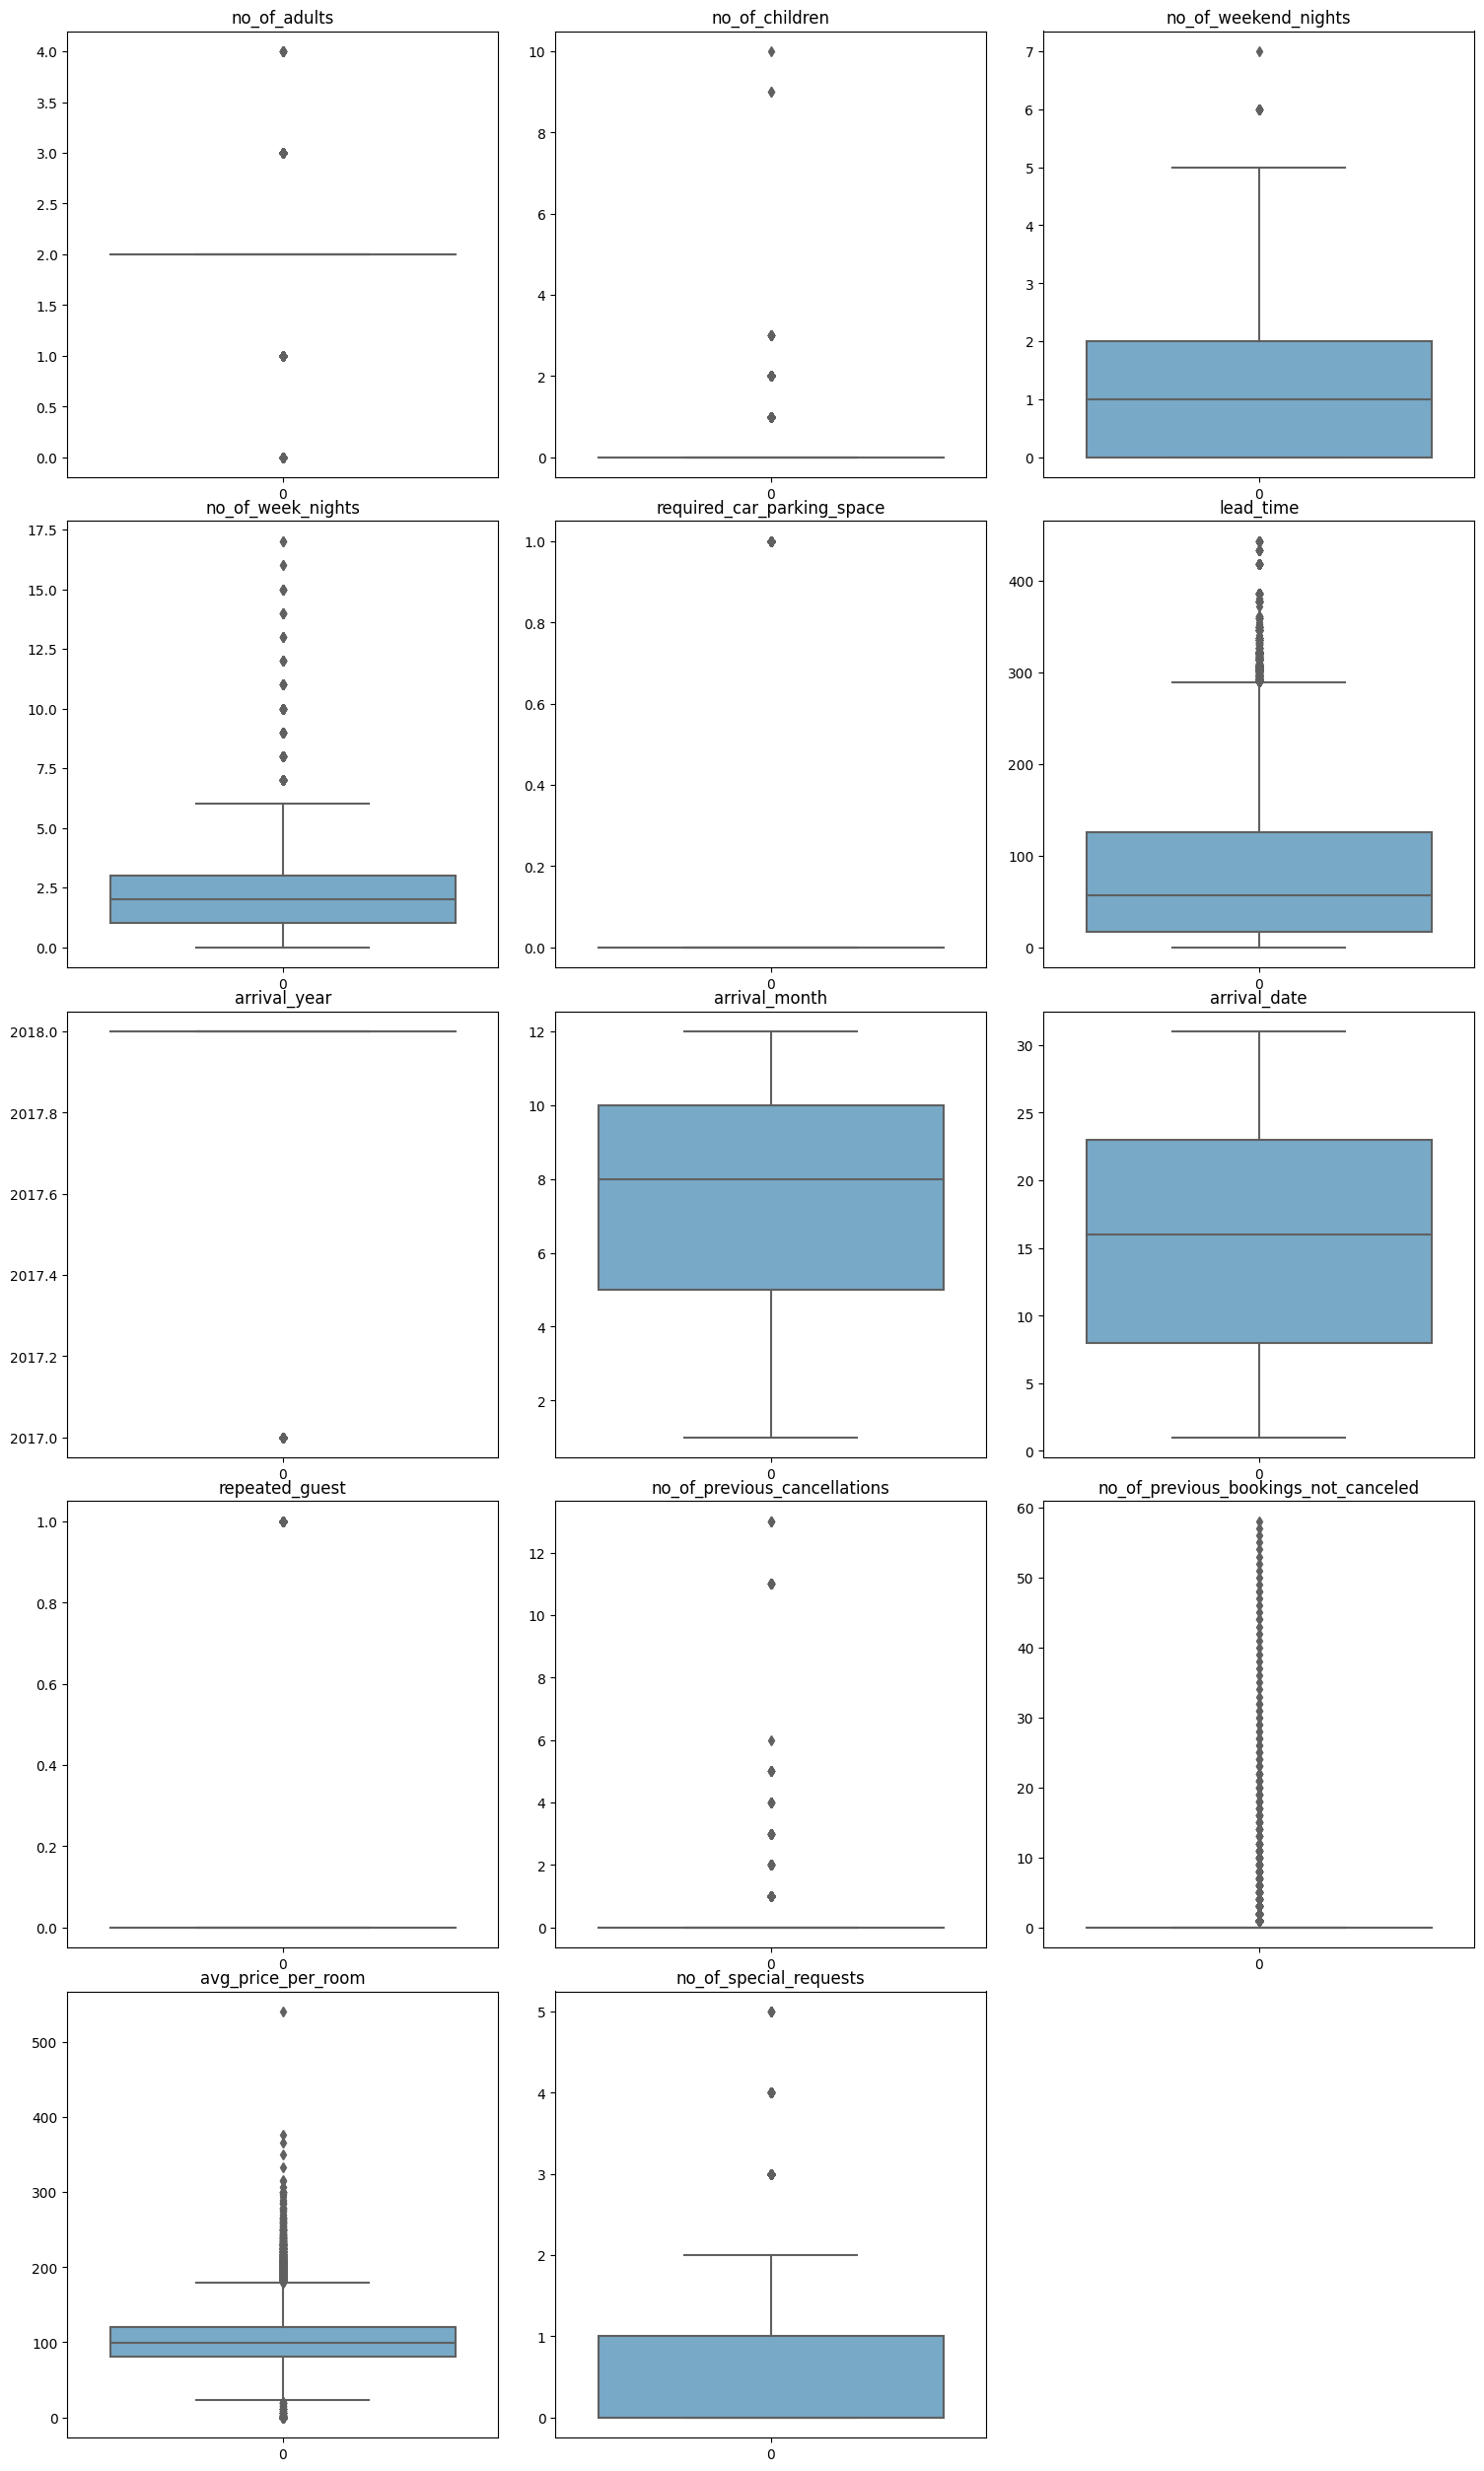

In [ ]:
# boxplot for numeic features
features = Data.select_dtypes(include=['int64', 'float64']).columns
# Create subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features - 1) // num_cols + 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

# Iterate through each feature and create a box plot
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    sns.boxplot(data=Data[feature], ax=ax,  palette="Blues")
    ax.set_title(feature)

# Remove any empty subplots
if num_features % num_cols != 0:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i // num_cols, i % num_cols])

# Display the plot
plt.show()

Boxplots Plots for 'lead_time' and 'avg_price_per_room' Features

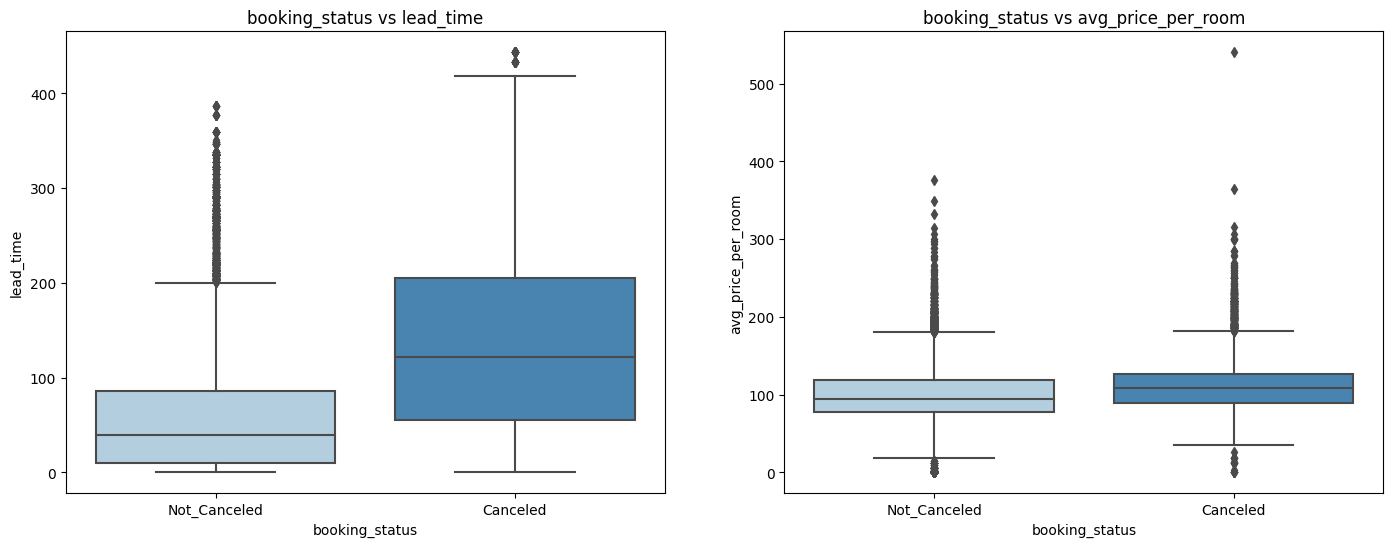

In [ ]:
# boxplots for some features vs. target column
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(17,6))
sns.boxplot(data=Data, x="booking_status",y=Data['lead_time'],palette="Blues" , ax=ax1)
sns.boxplot(data=Data, x="booking_status",y=Data['avg_price_per_room'],palette="Blues", ax= ax2)
ax1.set_title('booking_status vs lead_time')
ax2.set_title('booking_status vs avg_price_per_room')
plt.show()

This Chart indicates that if the difference between booking date and arrival date more than 90 days almost this will lead to the cancellation But if the booking near to arrival this will lead to not cancellation the booking

Categorical columns

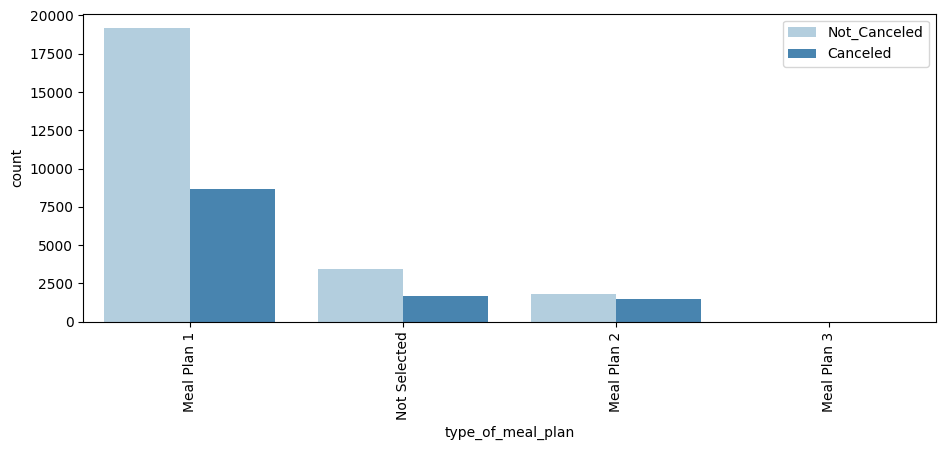

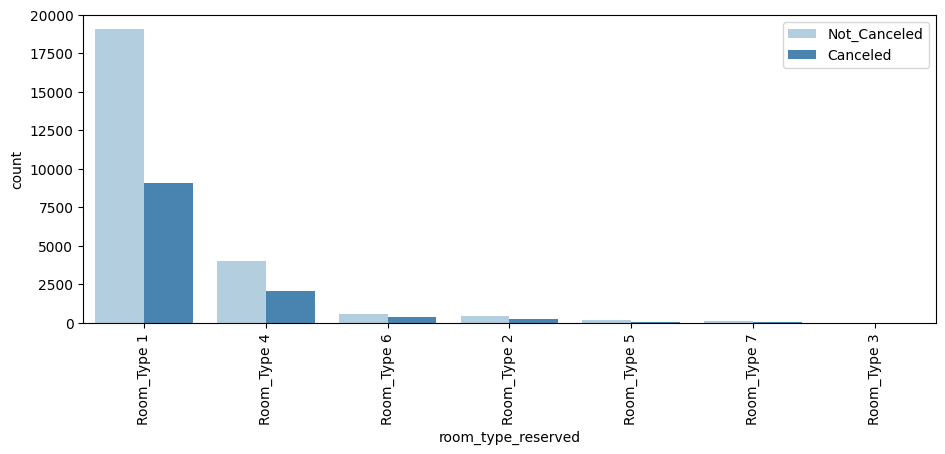

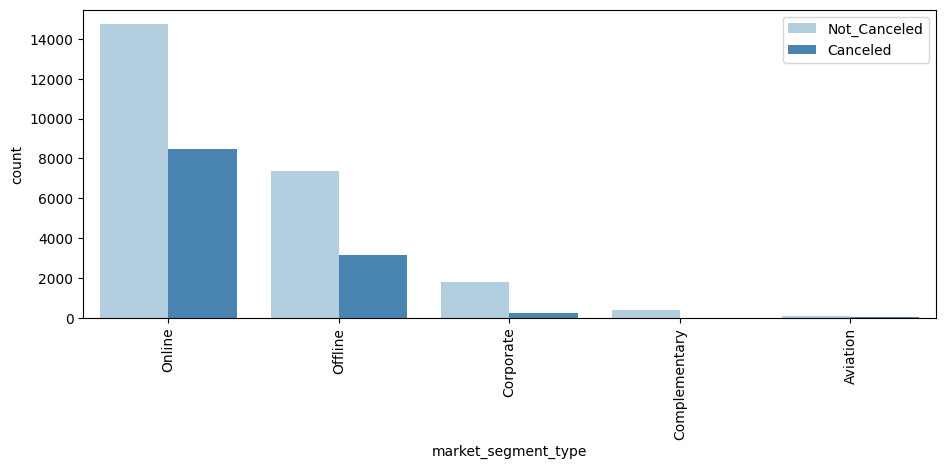

In [ ]:
# Categorical features distribution vs. target column
cat_variables = ['type_of_meal_plan','room_type_reserved','market_segment_type']
for i in cat_variables:
    fig_dims = (11, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=i, hue="booking_status", ax=ax, data=Data,palette="Blues",order=Data[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

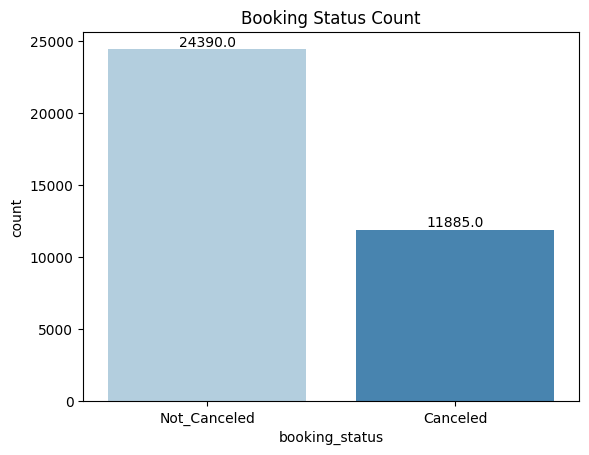

In [ ]:
# Create the countplot
ax = sns.countplot(data=Data, x='booking_status', palette='Blues', hue_order='booking_status')

# Set the title
plt.title('Booking Status Count')


# Add annotations
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()
    # Add the text annotation above the bar with a small offset
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Show the plot
plt.show()


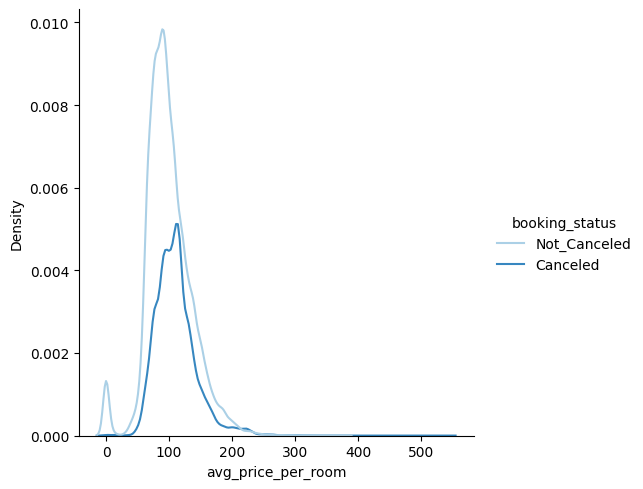

In [ ]:
sns.displot(Data,x="avg_price_per_room",hue="booking_status", kind="kde",palette="Blues")

Average price of room for canceled and not-canceled booking in the same range

In [ ]:
# define a DataFrame named 'df_2018'
Data_2017 = Data[Data['arrival_year'] == 2017]

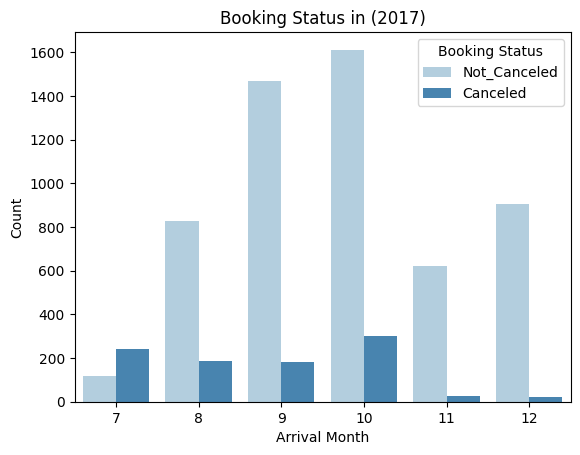

In [ ]:
# Assuming you have a DataFrame named 'df_2018' with columns 'arrival_month' and 'booking_status'
sns.countplot(data=Data_2017, x="arrival_month", palette="Blues", hue="booking_status")

# Set chart title and labels
plt.title("Booking Status in (2017)")
plt.xlabel("Arrival Month")
plt.ylabel("Count")

# Show the legend
plt.legend(title="Booking Status")

# Display the chart
plt.show()

In [ ]:
Data_2018 = Data[Data['arrival_year'] == 2018]

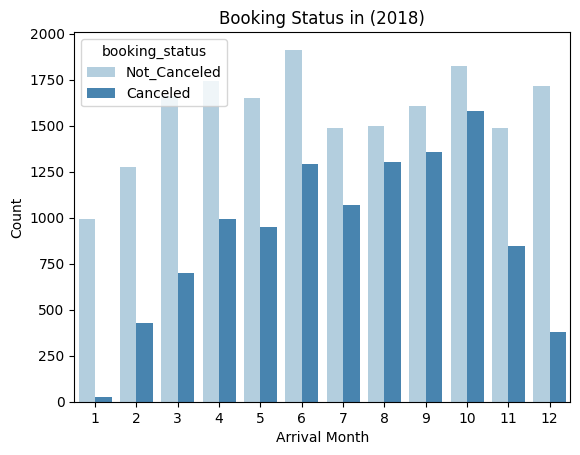

In [ ]:
# Assuming you have a DataFrame named 'df_2018' with columns 'arrival_month' and 'booking_status'
sns.countplot(data=Data_2018, x="arrival_month", palette="Blues", hue="booking_status")

# Set chart title and labels
plt.title("Booking Status in (2018)")
plt.xlabel("Arrival Month")
plt.ylabel("Count")

# Show the legend
plt.legend(title="booking_status")

# Display the chart
plt.show()

lead_time: Number of days between the date of booking and the arrival date

In [ ]:
## baysiean prob given
def prob_calculation(Data,col_name):
    unique_list= pd.unique(Data[col_name])
    for i in unique_list:
        Data_all = Data[Data[col_name] == i]
        print('probability booking is Canceled given',col_name,'=',i,'is',len(Data_all[Data_all['booking_status'] == 'Canceled'])*100/len(Data_all))

In [ ]:
prob_calculation(Data,"market_segment_type")

probability booking is Canceled given market_segment_type = Offline is 29.94870820668693
probability booking is Canceled given market_segment_type = Online is 36.508141638666324
probability booking is Canceled given market_segment_type = Corporate is 10.907288051561725
probability booking is Canceled given market_segment_type = Aviation is 29.6
probability booking is Canceled given market_segment_type = Complementary is 0.0


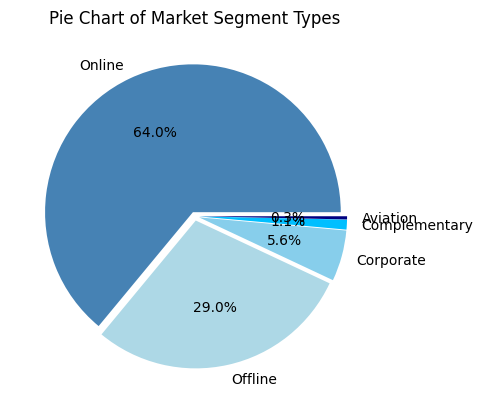

In [ ]:
# Pie Chart of Market Segment Types
market_segment_counts = Data['market_segment_type'].value_counts()
labels = market_segment_counts.index
colors = ['steelblue','lightblue', 'skyblue', 'deepskyblue', 'navy']
explode = [0.03] * len(labels)

plt.pie(market_segment_counts, labels=labels, colors=colors, explode=explode,autopct = '%.2f%%')
plt.title('Pie Chart of Market Segment Types')
plt.show()

<Axes: xlabel='market_segment_type', ylabel='lead_time'>

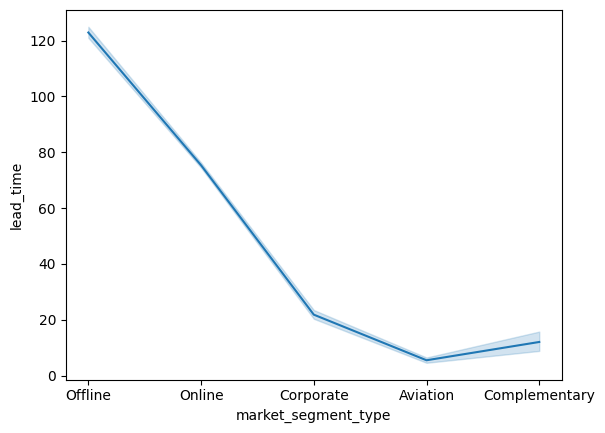

In [ ]:
sns.lineplot(x = "market_segment_type", y= "lead_time", data = Data)

Complementary and Corporate -----> Less segments that cancel booking

<Axes: xlabel='no_of_previous_cancellations', ylabel='count'>

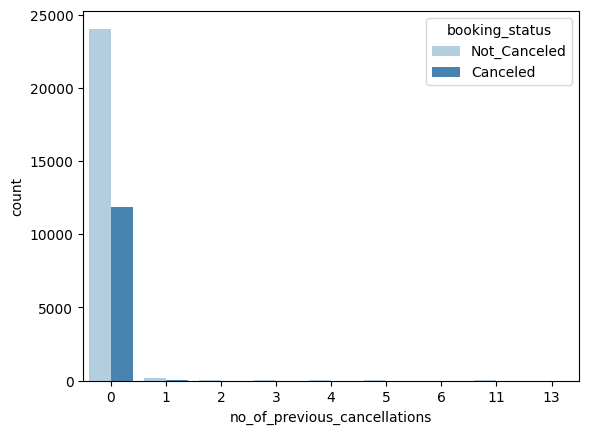

In [ ]:
sns.countplot(data=Data, x="no_of_previous_cancellations", hue="booking_status", palette="Blues")

In [ ]:
prob_calculation(Data,"no_of_previous_cancellations")

probability booking is Canceled given no_of_previous_cancellations = 0 is 33.02724211815121
probability booking is Canceled given no_of_previous_cancellations = 3 is 2.3255813953488373
probability booking is Canceled given no_of_previous_cancellations = 1 is 5.555555555555555
probability booking is Canceled given no_of_previous_cancellations = 2 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 11 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 4 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 5 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 13 is 100.0
probability booking is Canceled given no_of_previous_cancellations = 6 is 0.0


<Axes: xlabel='no_of_special_requests', ylabel='avg_price_per_room'>

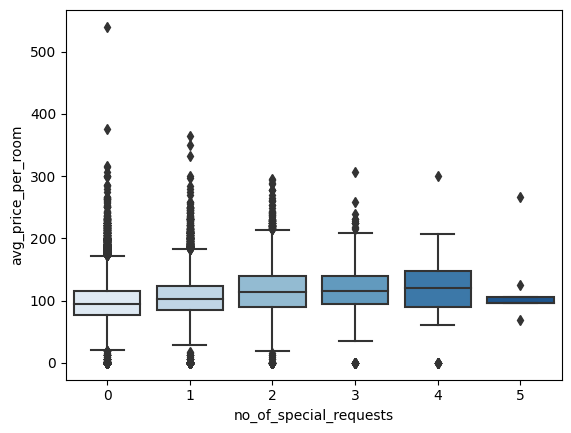

In [ ]:
sns.boxplot(x = "no_of_special_requests", y= "avg_price_per_room", data = Data, palette="Blues")

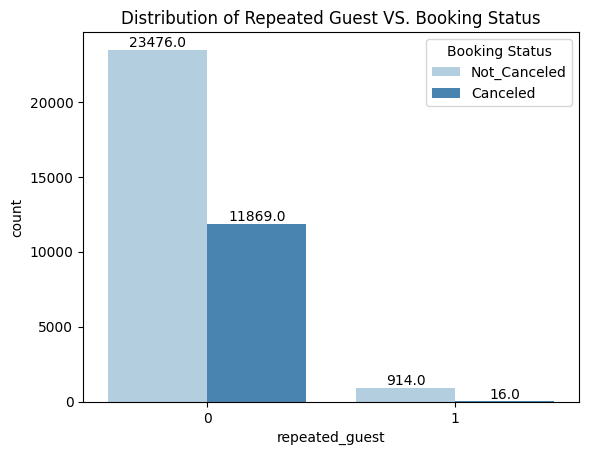

In [ ]:
# Distribution of Repeated Guest
countplot_repeated_guest = sns.countplot(x='repeated_guest', data=Data, palette="Blues",hue='booking_status')
for p in countplot_repeated_guest.patches:
    countplot_repeated_guest.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Distribution of Repeated Guest VS. Booking Status')
plt.legend(title='Booking Status')
plt.show()

Most of guests are vistors for the first time

# Data Pre-processing

## **Dealing with categorical features:**
                                      Booking_ID
                                      type_of_meal_plan
                                      room_type_reserved
                                      market_segment_type
                                      booking_status

In [ ]:
# remove Booking_ID column
Data = Data.drop('Booking_ID', axis=1)

In [ ]:
# convert target columns 'booking_status' to numeric
Data['booking_status'] = Data['booking_status'].replace(['Canceled', 'Not_Canceled'],[1,0])

In [ ]:
# convert the categorical features
categorical_columns = ['room_type_reserved', 'type_of_meal_plan', 'market_segment_type']
Data = pd.get_dummies(Data, columns=categorical_columns)
Data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 7  \
0             2               0  ...                               0   
1             6               0  ...                               0   
2            28               0  ...                               0   
3            20               0  ...                               0   
4            11               0  ...                               0   

   type_of_meal_plan_Meal Plan 1  type_of_meal_plan_Meal Plan 2  \
0                              1                              0   
1                              0                              0   
2                              1                              0   
3                              1                              0   
4                              0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   market_segment_type_Aviation  market_segment_type_Complementary  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 31 columns]

In [ ]:
print("Shape of data before handeling correlation features:",Data.shape)

Shape of data before handeling correlation features: (36275, 31)


# Feature Engineering

# Handeling corelatted features

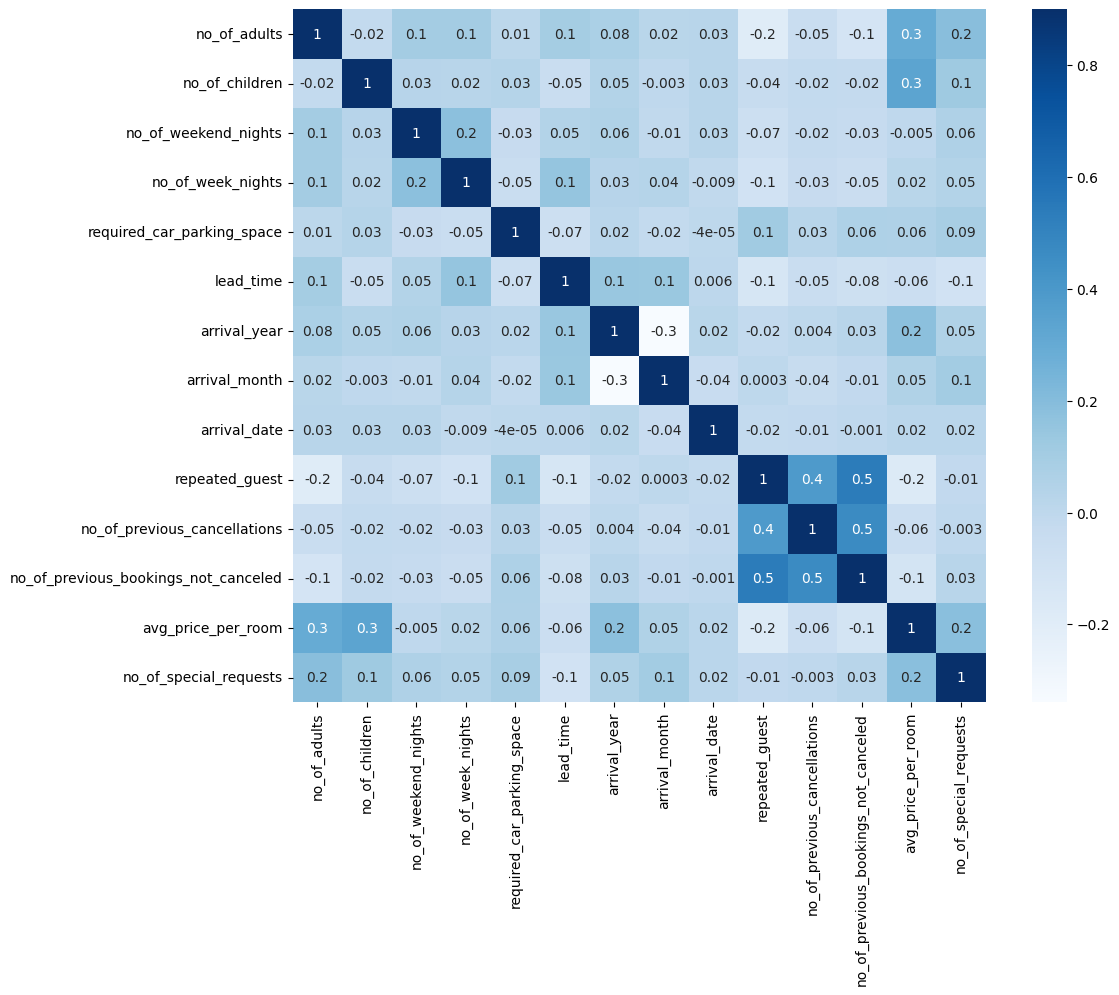

In [ ]:
cor_matrix = Data[features].corr()  # Calculate correlation matrix
plt.subplots(figsize=(12,9))
sns.heatmap(cor_matrix,  annot=True, vmax=0.9, square=True,cmap='Blues',fmt='.1g')
plt.show()

In [ ]:
# Drop correlated features if any exist
cor_threshold = 0.5
corr_matrix = Data[features].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > cor_threshold)]
print("The Highly correlated features:",highly_correlated)

The Highly correlated features: ['no_of_previous_bookings_not_canceled']


In [ ]:
Data = Data.drop(columns=highly_correlated)
print("Shape of data after handeling highly correlated features:",Data.shape)

Shape of data after handeling highly correlated features: (36275, 30)


## **Log Normalizaion**

In [ ]:
# make copy of data
Normalized_Data =  Data.copy()
# log normalize numeric features
Normalized_Data['no_of_adults'] = np.log(Normalized_Data['no_of_adults'] + 1)
Normalized_Data['no_of_children'] = np.log(Normalized_Data['no_of_children'] + 1)
Normalized_Data['no_of_weekend_nights'] = np.log(Normalized_Data['no_of_weekend_nights'] + 1)
Normalized_Data['no_of_week_nights'] = np.log(Normalized_Data['no_of_week_nights'] + 1)
Normalized_Data['required_car_parking_space'] = np.log(Normalized_Data['required_car_parking_space'] + 1)
Normalized_Data['lead_time'] = np.log(Normalized_Data['lead_time'] + 1)
Normalized_Data['repeated_guest'] = np.log(Normalized_Data['repeated_guest'] + 1)
Normalized_Data['no_of_previous_cancellations'] = np.log(Normalized_Data['no_of_previous_cancellations'] + 1)
Normalized_Data['avg_price_per_room'] = np.log(Normalized_Data['avg_price_per_room'] + 1)
Normalized_Data['no_of_special_requests'] = np.log(Normalized_Data['no_of_special_requests'] + 1)

In [ ]:
Normalized_Data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      1.098612             0.0              0.693147           1.098612   
1      1.098612             0.0              1.098612           1.386294   
2      0.693147             0.0              1.098612           0.693147   
3      1.098612             0.0              0.000000           1.098612   
4      1.098612             0.0              0.693147           0.693147   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                         0.0   5.416100          2017             10   
1                         0.0   1.791759          2018             11   
2                         0.0   0.693147          2018              2   
3                         0.0   5.356586          2018              5   
4                         0.0   3.891820          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 7  \
0             2             0.0  ...                               0   
1             6             0.0  ...                               0   
2            28             0.0  ...                               0   
3            20             0.0  ...                               0   
4            11             0.0  ...                               0   

   type_of_meal_plan_Meal Plan 1  type_of_meal_plan_Meal Plan 2  \
0                              1                              0   
1                              0                              0   
2                              1                              0   
3                              1                              0   
4                              0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   market_segment_type_Aviation  market_segment_type_Complementary  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 30 columns]

# Models

In [ ]:
# split data into x and y after log normalization
# input valiable a X
X_normalized = Normalized_Data.drop('booking_status', axis=1)
# output variable as y
y_normalized = Normalized_Data['booking_status']

In [ ]:
print(Data.booking_status.value_counts())

0    24390
1    11885
Name: booking_status, dtype: int64


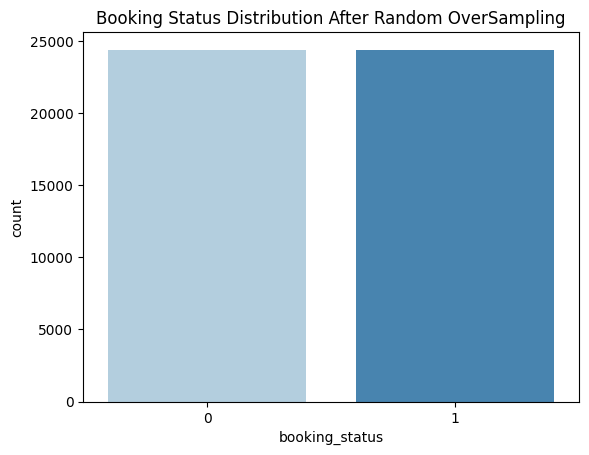

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X_normalized, y_normalized)
ax = sns.countplot(x=y,palette="Blues")
# Set the title
plt.title('Booking Status Distribution After Random OverSampling')
# Show the plot
plt.show()

## Split the dataset into training and test and scaling it

In [ ]:
### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# function to plot the confusion matrix
def plot_confusion_matrix(cm):
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

In [ ]:
# function for evaluation
def evaluate_classification(Y_test, Y_pred):
    report = classification_report(Y_test, Y_pred)
    test_accuracy = accuracy_score(Y_test, Y_pred)
    confusion = confusion_matrix(Y_test, Y_pred)
    plot_confusion_matrix(confusion)
    return report, test_accuracy

# Decision Tree

In [ ]:
dc = DecisionTreeClassifier(random_state=24)
rf= RandomForestClassifier(random_state=24)
knn= KNeighborsClassifier()

Decision Tree Classifier


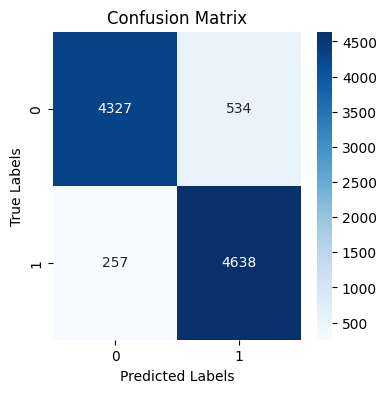

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      4861
           1       0.90      0.95      0.92      4895

    accuracy                           0.92      9756
   macro avg       0.92      0.92      0.92      9756
weighted avg       0.92      0.92      0.92      9756

Training Accuracy of Decision Tree: 0.9939011890118902
Testing Accurcy of Decision Tree: 0.9189216892168922


In [ ]:
# apply decision tree classifier
dc.fit(X_train, y_train)
y_pred_dc = dc.predict(X_test)
print("Decision Tree Classifier")
report_dc, test_acc_dc = evaluate_classification(y_test, y_pred_dc)
print("Classification Report:\n",report_dc)
# Compute training accuracy
train_acc_dc = dc.score(X_train, y_train)
print("Training Accuracy of Decision Tree:", train_acc_dc)
print("Testing Accurcy of Decision Tree:",test_acc_dc)

# Grid search for Decision Tree

In [ ]:
# apply grid search on decession tree classifier
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['gini','entropy'],"max_features": np.arange(3, 15),'max_depth': np.arange(3, 15)}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END ........criterion=gini, max_depth=3, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=4; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=4; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=4; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=4; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=4; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=3,

Decision Tree Classifier with Grid Search


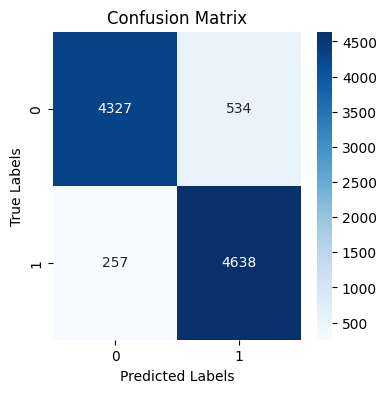

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      4861
           1       0.90      0.95      0.92      4895

    accuracy                           0.92      9756
   macro avg       0.92      0.92      0.92      9756
weighted avg       0.92      0.92      0.92      9756

Training Accuracy of Grid Decision Tree: 0.8935783107831078
Accurcy of Grid Decision Tree: 0.9189216892168922


In [ ]:
grid_dc = DecisionTreeClassifier(criterion='gini',max_depth=14,max_features=14,random_state=24)
grid_dc.fit(X_train, y_train)
y_pred_grid_dc = dc.predict(X_test)
print("Decision Tree Classifier with Grid Search")
report_grid_dc, test_acc_grid_dc = evaluate_classification(y_test, y_pred_grid_dc)
print("Classification Report:\n",report_grid_dc)
# Compute training accuracy
train_acc_grid_dc = grid_dc.score(X_train, y_train)
print("Training Accuracy of Grid Decision Tree:", train_acc_grid_dc)
print("Accurcy of Grid Decision Tree:",test_acc_grid_dc)

# Support vector Machine

Support Vector Machine Classifier:


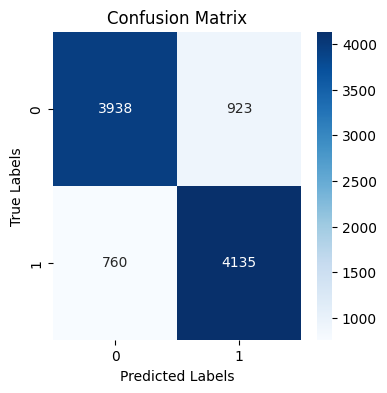

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      4861
           1       0.82      0.84      0.83      4895

    accuracy                           0.83      9756
   macro avg       0.83      0.83      0.83      9756
weighted avg       0.83      0.83      0.83      9756

Training Accuracy of SVM: 0.8320520705207052
Testing Accurcy of SVM: 0.827490774907749


In [ ]:
# apply SVM classifier
from sklearn.svm import SVC
svc = SVC(random_state=24)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
print("Support Vector Machine Classifier:")
report_svm, test_acc_svm = evaluate_classification(y_test, y_pred_svc)
print("Classification Report:\n",report_svm)
# Compute training accuracy
train_acc_svm = svc.score(X_train_scaled, y_train)
print("Training Accuracy of SVM:", train_acc_svm)
print("Testing Accurcy of SVM:",test_acc_svm)

# Grid Search for SVM

In [ ]:
# apply grid search on SVM classifier
from sklearn.model_selection import GridSearchCV
    # 'C': [0.1, 1, 10],
    # 'gamma': [0.1, 1, 10]
param_grid = {'C': [0.1, 10, 100],'gamma': [0.01, 0.001, 0.0001],'kernel': ['rbf','sigmoid']}
svc_grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
svc_grid.fit(X_train_scaled,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time= 1.7min
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time= 1.9min
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time= 1.8min
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time= 1.8min
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time= 1.7min
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.8min
[CV] END .....................C=0.1, gamma=0.001

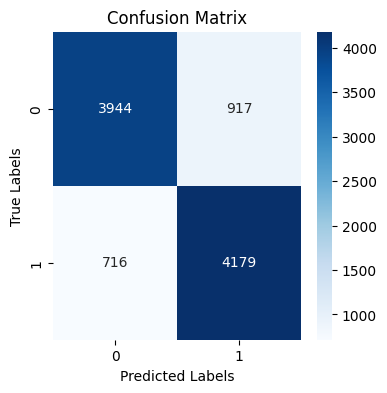

Support Vector Machine Classifier with Grid Search:
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      4861
           1       0.82      0.85      0.84      4895

    accuracy                           0.83      9756
   macro avg       0.83      0.83      0.83      9756
weighted avg       0.83      0.83      0.83      9756

Training Accuracy of Grid SVM: 0.8414052890528906
Testing Accurcy of Grid SVM: 0.8326158261582616


In [ ]:
y_pred_svc_grid = svc_grid.predict(X_test_scaled)
report_svm_grid, test_acc_grid_svm = evaluate_classification(y_test, y_pred_svc_grid)
print("Support Vector Machine Classifier with Grid Search:")
print("Classification Report:\n",report_svm_grid)
# Compute training accuracy
train_acc_grid_svm = svc_grid.score(X_train_scaled, y_train)
print("Training Accuracy of Grid SVM:", train_acc_grid_svm)
print("Testing Accurcy of Grid SVM:",test_acc_grid_svm)

In [ ]:
# Calculate the predicted probabilities
y_prob_SVM = svc_grid.decision_function(X_test_scaled)

##Precision-Recall Curve:

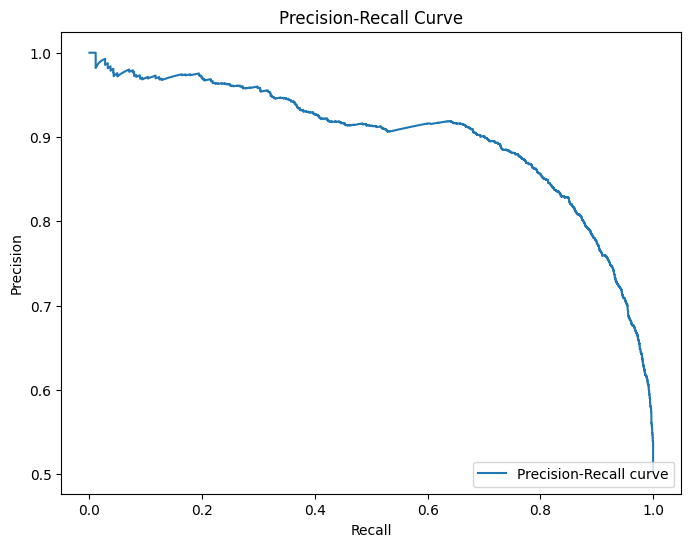

In [ ]:
# Calculate the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_SVM)
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

#ROC Curve:

In [ ]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_SVM)

# Calculate the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

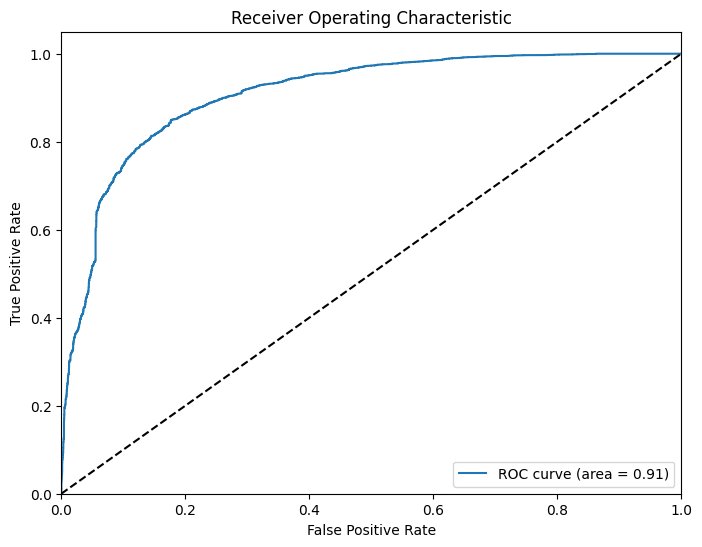

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest

Random Forest Classifier


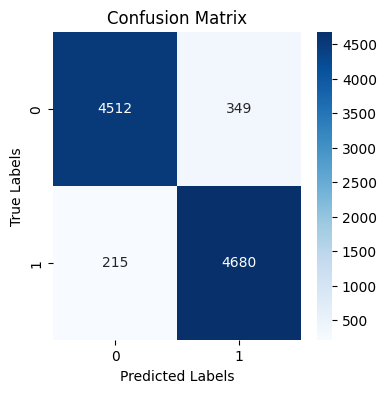

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      4861
           1       0.93      0.96      0.94      4895

    accuracy                           0.94      9756
   macro avg       0.94      0.94      0.94      9756
weighted avg       0.94      0.94      0.94      9756

Training Accuracy of Random Forest: 0.9939011890118902
Testing Accurcy of Random Forest: 0.942189421894219


In [ ]:
# apply random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=24)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier")
report_rf, test_acc_rf = evaluate_classification(y_test, y_pred_rf)
print("Classification Report:\n",report_rf)

# Compute training accuracy
train_acc_rf = rf.score(X_train, y_train)
print("Training Accuracy of Random Forest:", train_acc_rf)
print("Testing Accurcy of Random Forest:",test_acc_rf)

In [ ]:
# apply grid search on random forest classifier
param_grid = {'n_estimators': [50,100,150],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2)
grid_rf.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.6s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   2.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   1.7s
[CV

Random Forest Classifier with Grid Search


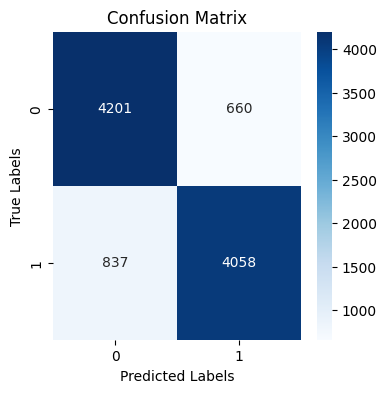

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      4861
           1       0.86      0.83      0.84      4895

    accuracy                           0.85      9756
   macro avg       0.85      0.85      0.85      9756
weighted avg       0.85      0.85      0.85      9756

Training Accuracy of Grid Random Forest: 0.8440959409594095
Testing Accurcy of Grid Random Forest: 0.8465559655596556


In [ ]:
y_pred_grid_rf = grid_rf.predict(X_test)
print("Random Forest Classifier with Grid Search")
report_grid_rf, test_acc_grid_rf = evaluate_classification(y_test, y_pred_grid_rf)
print("Classification Report:\n",report_grid_rf)
# Compute training accuracy
train_acc_grid_rf = grid_rf.score(X_train, y_train)
print("Training Accuracy of Grid Random Forest:", train_acc_grid_rf)
print("Testing Accurcy of Grid Random Forest:",test_acc_grid_rf)

#XGBoost

In [ ]:
# Create XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_XGB = xgb_model.predict(X_test)

XGBoost Classifier:


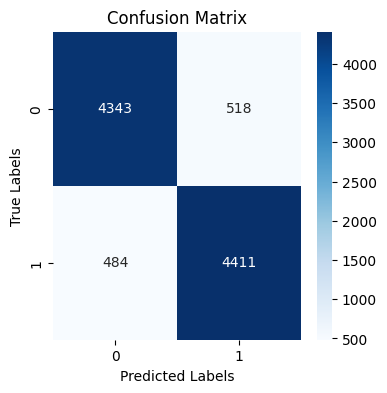

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      4861
           1       0.89      0.90      0.90      4895

    accuracy                           0.90      9756
   macro avg       0.90      0.90      0.90      9756
weighted avg       0.90      0.90      0.90      9756

Training Accuracy of XGBoost: 0.9198185731857319
Testing Accurcy of XGBoost: 0.8972939729397293


In [ ]:
# evaluate XGBoost accuracy
print("XGBoost Classifier:")
report_xgboost, test_acc_xgboost = evaluate_classification(y_test, y_pred_XGB)
print("Classification Report:\n",report_xgboost)
# Compute training accuracy
train_acc_xgboost = xgb_model.score(X_train, y_train)
print("Training Accuracy of XGBoost:", train_acc_xgboost)
print("Testing Accurcy of XGBoost:",test_acc_xgboost)

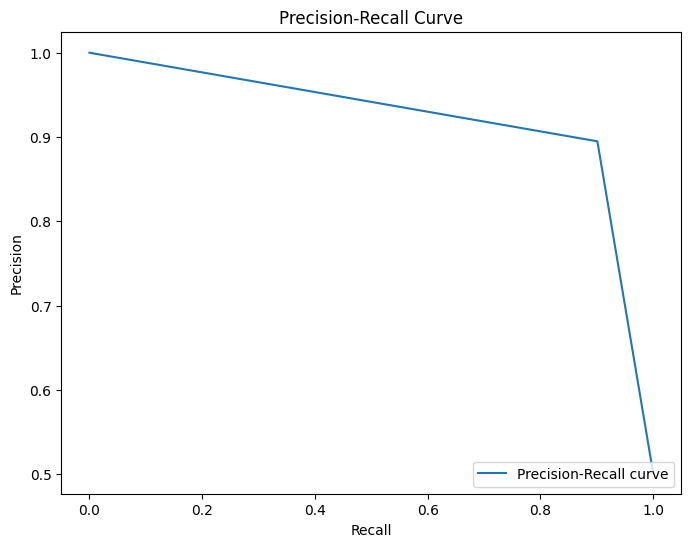

In [ ]:
# Calculate the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_XGB)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

##Grid Search for XGBoost

In [ ]:
# take alot of time to train
#  Define the parameter grid
param_grid = {
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.001],
    'n_estimators': [100, 500],
    'gamma': [0.1, 0.2]
}
# Perform grid search
xgboost_grid = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
xgboost_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.1, 0.2], 'learning_rate': [0.01, 0.001],
                         'max_depth': [5, 7], 'n_estimators': [100, 500]},
             scoring='accuracy')

In [ ]:
# Get the best model
best_model = xgboost_grid.best_estimator_

# Predict on the test set using the best model
y_pred_grid_XGB = best_model.predict(X_test)

XGBoost Classifier with Grid Search :


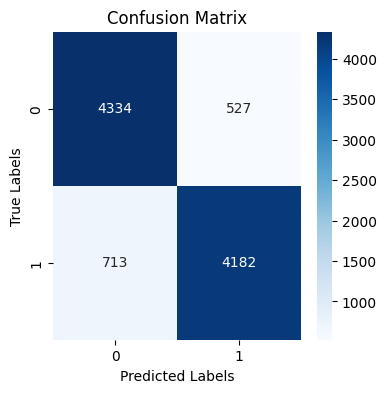

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4861
           1       0.89      0.85      0.87      4895

    accuracy                           0.87      9756
   macro avg       0.87      0.87      0.87      9756
weighted avg       0.87      0.87      0.87      9756

Training Accuracy of Grid Random Forest: 0.8753587535875359
Testing Accurcy of Grid XGBoost: 0.8728987289872898


In [ ]:
# evaluate grid XGBoost
print("XGBoost Classifier with Grid Search :")
report_grid_xgb, test_acc_grid_xgb = evaluate_classification(y_test, y_pred_grid_XGB)
print("Classification Report:\n",report_grid_xgb)
# Compute training accuracy
train_acc_grid_xgb = xgboost_grid.score(X_train, y_train)
print("Training Accuracy of Grid Random Forest:", train_acc_grid_xgb)
print("Testing Accurcy of Grid XGBoost:",test_acc_grid_xgb)

In [ ]:
# Print the best hyperparameters found
print("Best Hyperparameters:", xgboost_grid.best_params_)

Best Hyperparameters: {'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}


## Neural Network Model


Epoch 1/20
1220/1220 [==============================] - 11s 8ms/step - loss: 0.5433 - accuracy: 0.7311 - val_loss: 0.4561 - val_accuracy: 0.7873
Epoch 2/20
1220/1220 [==============================] - 5s 4ms/step - loss: 0.4708 - accuracy: 0.7835 - val_loss: 0.4418 - val_accuracy: 0.7999
Epoch 3/20
1220/1220 [==============================] - 9s 7ms/step - loss: 0.4528 - accuracy: 0.7914 - val_loss: 0.4245 - val_accuracy: 0.8049
Epoch 4/20
1220/1220 [==============================] - 5s 4ms/step - loss: 0.4417 - accuracy: 0.8001 - val_loss: 0.4129 - val_accuracy: 0.8125
Epoch 5/20
1220/1220 [==============================] - 5s 4ms/step - loss: 0.4339 - accuracy: 0.8025 - val_loss: 0.4092 - val_accuracy: 0.8153
Epoch 6/20
1220/1220 [==============================] - 6s 5ms/step - loss: 0.4270 - accuracy: 0.8039 - val_loss: 0.4032 - val_accuracy: 0.8216
Epoch 7/20
1220/1220 [==============================] - 4s 3ms/step - loss: 0.4233 - accuracy: 0.8079 - val_loss: 0.3974 - val_accuracy

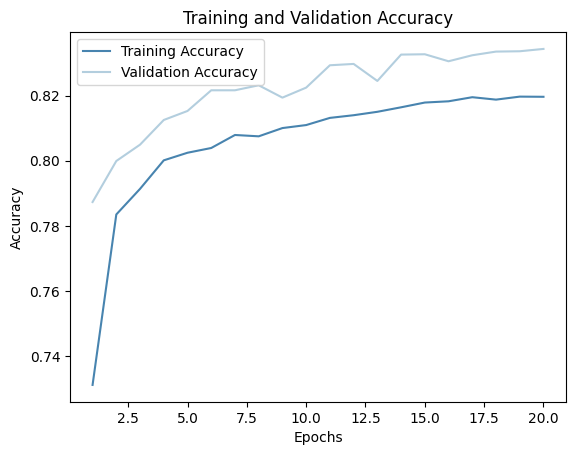

In [ ]:
# Neural Network Model
# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Get the accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
# Plotting accuracy
plt.plot(epochs, train_accuracy,  color='#4884AF', label='Training Accuracy')
plt.plot(epochs, val_accuracy,  color='#B3CEDE', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the NN model
# Compute training accuracy
train_loss, nn_train_accuracy = nn_model.evaluate(X_train_scaled, y_train)
print("Training Accuracy of Neural Network Model:", nn_train_accuracy)

# Compute testing accuracy
test_loss, nn_test_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print("Testing Accuracy of Neural Network Model::", nn_test_accuracy)

1220/1220 [==============================] - 3s 2ms/step - loss: 0.3626 - accuracy: 0.8348
Training Accuracy of Neural Network Model: 0.8348196148872375
305/305 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8344
Testing Accuracy of Neural Network Model:: 0.8343583345413208


# Neural Network Model with Grid Search

Best Learning Rate: 0.001
Best Dropout Rate: 0.3


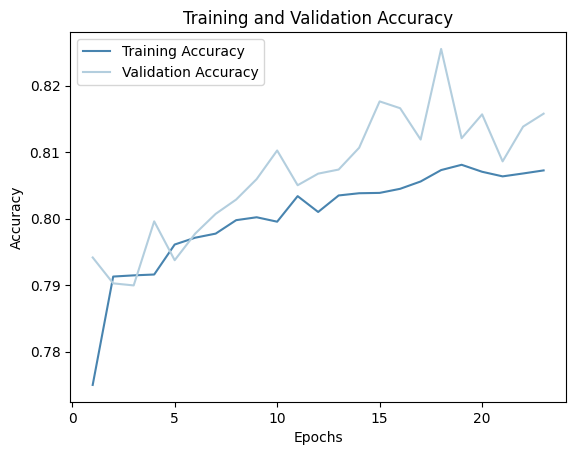

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
# Function to create the Keras model
def create_model(learning_rate=0.001, dropout_rate=0.5):
    nn_model = Sequential()
    nn_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_dim=X_train.shape[1]))
    nn_model.add(Dropout(dropout_rate))
    nn_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    nn_model.add(Dropout(dropout_rate))
    nn_model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the given learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return nn_model

# Create the KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=32, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform the grid search
grid_result = grid_search.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Get the best hyperparameters
best_learning_rate = grid_result.best_params_['learning_rate']
best_dropout_rate = grid_result.best_params_['dropout_rate']

# Print the best hyperparameters
print("Best Learning Rate:", best_learning_rate)
print("Best Dropout Rate:", best_dropout_rate)

# Plotting accuracy
train_accuracy = grid_result.best_estimator_.model.history.history['accuracy']
val_accuracy = grid_result.best_estimator_.model.history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, color='#4884AF', label='Training Accuracy')
plt.plot(epochs, val_accuracy, color='#B3CEDE', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/20
930/930 [==============================] - 5s 4ms/step - loss: 0.5035 - accuracy: 0.7542 - val_loss: 0.4434 - val_accuracy: 0.7880
Epoch 2/20
930/930 [==============================] - 3s 3ms/step - loss: 0.4474 - accuracy: 0.7911 - val_loss: 0.4224 - val_accuracy: 0.8009
Epoch 3/20
930/930 [==============================] - 3s 4ms/step - loss: 0.4324 - accuracy: 0.7986 - val_loss: 0.4101 - val_accuracy: 0.8169
Epoch 4/20
930/930 [==============================] - 5s 5ms/step - loss: 0.4202 - accuracy: 0.8069 - val_loss: 0.3971 - val_accuracy: 0.8188
Epoch 5/20
930/930 [==============================] - 3s 3ms/step - loss: 0.4148 - accuracy: 0.8096 - val_loss: 0.3924 - val_accuracy: 0.8246
Epoch 6/20
930/930 [==============================] - 6s 7ms/step - loss: 0.4072 - accuracy: 0.8134 - val_loss: 0.3880 - val_accuracy: 0.8252
Epoch 7/20
930/930 [==============================] - 10s 11ms/step - loss: 0.4032 - accuracy: 0.8145 - val_loss: 0.3857 - val_accuracy: 0.8263
Epoc

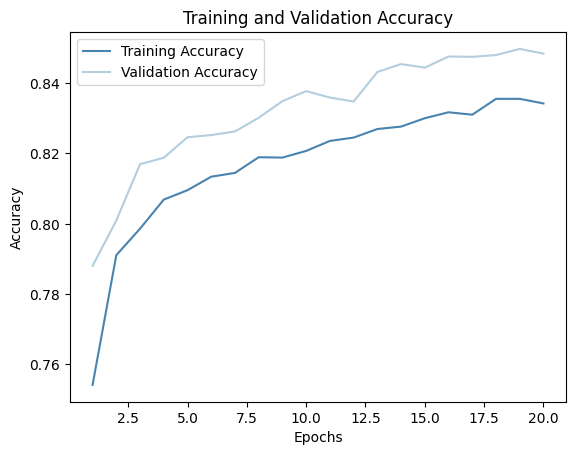

In [ ]:
# Neural Network Model
# Build the neural network model
nn_model_grid = Sequential()
nn_model_grid.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn_model_grid.add(Dropout(0.3))
nn_model_grid.add(Dense(64, activation='relu'))
nn_model_grid.add(Dropout(0.3))
nn_model_grid.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model_grid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = nn_model_grid.fit(X_train_scaled, y_train, epochs=20, batch_size=42, validation_data=(X_test_scaled, y_test))

# Get the accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
# Plotting accuracy
plt.plot(epochs, train_accuracy,  color='#4884AF', label='Training Accuracy')
plt.plot(epochs, val_accuracy,  color='#B3CEDE', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the NN model
# Compute training accuracy
train_loss, nn_train_accurac_grid = nn_model_grid.evaluate(X_train_scaled, y_train)
print("Training Accuracy of Neural Network Model:", nn_train_accuracy)

# Compute testing accuracy
test_loss, nn_test_accuracy_grid = nn_model_grid.evaluate(X_test_scaled, y_test)
print("Testing Accuracy of Neural Network Model::", nn_test_accuracy)

1220/1220 [==============================] - 3s 2ms/step - loss: 0.3363 - accuracy: 0.8545
Training Accuracy of Neural Network Model: 0.8348196148872375
305/305 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8484
Testing Accuracy of Neural Network Model:: 0.8343583345413208


# Model Evaluation

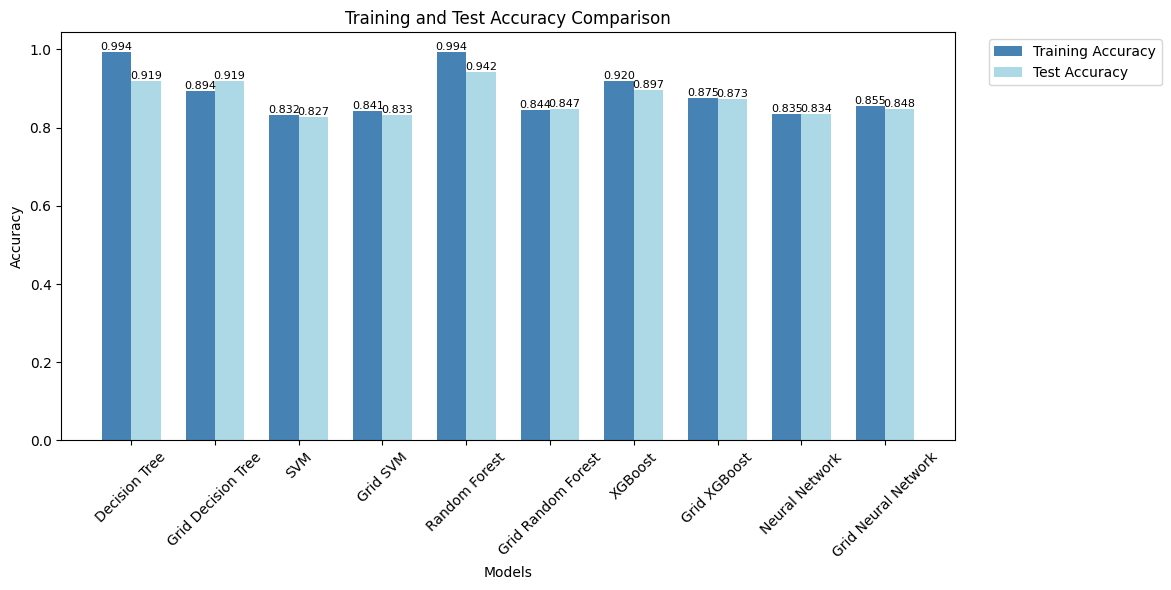

In [ ]:
# Store the training accuracy and test accuracy for each model
train_accuracy = [train_acc_dc, train_acc_grid_dc, train_acc_svm, train_acc_grid_svm, train_acc_rf, train_acc_grid_rf, train_acc_xgboost,train_acc_grid_xgb, nn_train_accuracy,nn_train_accurac_grid]
test_accuracy = [test_acc_dc, test_acc_grid_dc, test_acc_svm, test_acc_grid_svm, test_acc_rf, test_acc_grid_rf, test_acc_xgboost,test_acc_grid_xgb, nn_test_accuracy,nn_test_accuracy_grid]

# Define the model names for the x-axis
model_names = ['Decision Tree', 'Grid Decision Tree', 'SVM', 'Grid SVM', 'Random Forest', 'Grid Random Forest', 'XGBoost','Grid XGBoost', 'Neural Network','Grid Neural Network']

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for the x-axis
x_indices = np.arange(len(model_names))
figsize = (12, 6)

# Create a larger figure
plt.figure(figsize=figsize)
# Plotting the accuracy comparison as a bar chart
plt.bar(x_indices, train_accuracy, width=bar_width, color='steelblue', label='Training Accuracy')
plt.bar(x_indices + bar_width, test_accuracy, width=bar_width, color='lightblue', label='Test Accuracy')
# Add annotations for training accuracy
for i, v in enumerate(train_accuracy):
    plt.text(x_indices[i], v, f"{v:.3f}", ha='center', va='bottom', fontsize=8, color='black')

# Add annotations for test accuracy
for i, v in enumerate(test_accuracy):
    plt.text(x_indices[i] + bar_width, v, f"{v:.3f}", ha='center', va='bottom', fontsize=8, color='black')

plt.title('Training and Test Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(x_indices + bar_width / 2, model_names, rotation=45)
plt.tight_layout()
# Adjust the figure size to accommodate the legend outside
plt.subplots_adjust(right=0.8)  # Increase the right margin to make room for the legend
plt.show()

**As we can see, the best model based on testing accuracy is Random Forest algorithm. The reason of why is neural netkork doesn't achieve the highest score is that our data is tabular and is small, so it is not the best technique for it. The ML model is best for our case. Neural networks typically require a large amount of data to learn complex patterns effectively. As in our project, If the dataset is small, other algorithms like decision trees or random forests might generalize better with limited data.**

# Champion Model

Random Forest Classifier


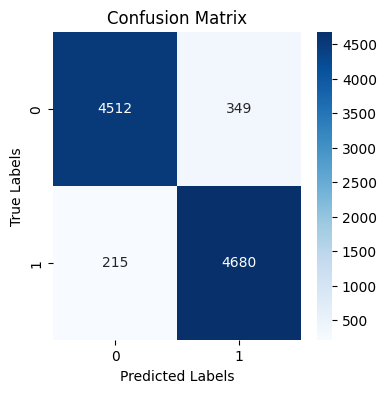

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      4861
           1       0.93      0.96      0.94      4895

    accuracy                           0.94      9756
   macro avg       0.94      0.94      0.94      9756
weighted avg       0.94      0.94      0.94      9756

Training Accuracy of Random Forest: 0.9939011890118902
Testing Accurcy of Random Forest: 0.942189421894219


In [ ]:
# Random Forest is the champion model as it achieves the highest testing accuracy
# apply random forest classifier
rf = RandomForestClassifier(random_state=24)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier")
report_rf, test_acc_rf = evaluate_classification(y_test, y_pred_rf)
print("Classification Report:\n",report_rf)

# Compute training accuracy
train_acc_rf = rf.score(X_train, y_train)
print("Training Accuracy of Random Forest:", train_acc_rf)
print("Testing Accurcy of Random Forest:",test_acc_rf)

In [ ]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

In [ ]:
# feature importance
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.058 seconds


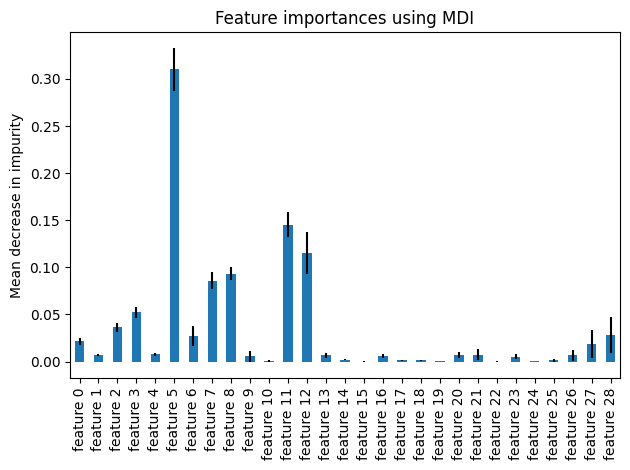

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
X_train # feature 5 is lead_time

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
28134      0.693147             0.0              0.000000           1.098612   
33820      1.098612             0.0              0.000000           1.386294   
20791      1.098612             0.0              1.098612           1.386294   
43902      1.098612             0.0              0.000000           0.693147   
32480      1.098612             0.0              1.098612           1.791759   
...             ...             ...                   ...                ...   
21243      0.693147             0.0              0.000000           1.386294   
45891      1.098612             0.0              0.000000           1.098612   
42613      0.693147             0.0              1.098612           0.693147   
43567      1.386294             0.0              0.693147           1.098612   
2732       1.098612             0.0              0.000000           0.693147   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
28134                         0.0   5.549076          2018              6   
33820                         0.0   4.564348          2018              5   
20791                         0.0   4.770685          2018              7   
43902                         0.0   5.420535          2018             11   
32480                         0.0   4.744932          2018              4   
...                           ...        ...           ...            ...   
21243                         0.0   1.791759          2017             12   
45891                         0.0   3.806662          2018             10   
42613                         0.0   0.693147          2018              2   
43567                         0.0   5.231109          2018              8   
2732                          0.0   3.784190          2018              6   

       arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 7  \
28134            15             0.0  ...                               0   
33820            19             0.0  ...                               0   
20791             8             0.0  ...                               0   
43902            25             0.0  ...                               0   
32480            30             0.0  ...                               0   
...             ...             ...  ...                             ...   
21243             1             0.0  ...                               0   
45891             5             0.0  ...                               0   
42613            28             0.0  ...                               0   
43567             8             0.0  ...                               0   
2732             18             0.0  ...                               0   

       type_of_meal_plan_Meal Plan 1  type_of_meal_plan_Meal Plan 2  \
28134                              0                              1   
33820                              1                              0   
20791                              1                              0   
43902                              0                              0   
32480                              1                              0   
...                              ...                            ...   
21243                              1                              0   
45891                              1                              0   
42613                              1                              0   
43567                              1                              0   
2732                               1                              0   

       type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
28134                              0                               0   
33820                              0                               0   
20791                              0                               0   
43902                              0                               

In [ ]:
# save the champion model
from joblib import dump
dump(rf, 'champion_model.joblib')

['champion_model.joblib']